In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from functools import reduce
from sklearn import preprocessing
import requests
from bs4 import BeautifulSoup

import datetime
import yfinance as yf
import time
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from datetime import date


plt.style.use('ggplot')

In [2]:
nasdaq= ['A', 'AA', 'AAC', 'AACG', 'AACI', 'AACIW', 'AADI', 'AAIC', 'AAIC^B', 'AAIC^C', 'AAIN', 'AAL', 'AAM^A', 'AAM^B', 'AAMC', 'AAME', 'AAN', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAT', 'AAU', 'AAWW', 'AB', 'ABB', 'ABBV', 'ABC', 'ABCB', 'ABCL', 'ABCM', 'ABEO', 'ABEV', 'ABG', 'ABGI', 'ABIO', 'ABM', 'ABNB', 'ABOS', 'ABR', 'ABR^D', 'ABR^E', 'ABR^F', 'ABSI', 'ABST', 'ABT', 'ABUS', 'ABVC', 'AC', 'ACA', 'ACAB', 'ACABU', 'ACABW', 'ACAC', 'ACACU', 'ACACW', 'ACAD', 'ACAH', 'ACAHU', 'ACAHW', 'ACAQ', 'ACAX', 'ACAXR', 'ACB', 'ACBA', 'ACBAU', 'ACBAW', 'ACCD', 'ACCO', 'ACDC', 'ACDCW', 'ACEL', 'ACER', 'ACET', 'ACGL', 'ACGLN', 'ACGLO', 'ACGN', 'ACHC', 'ACHL', 'ACHR', 'ACHV', 'ACI', 'ACIU', 'ACIW', 'ACLS', 'ACLX', 'ACM', 'ACMR', 'ACN', 'ACNB', 'ACNT', 'ACON', 'ACONW', 'ACOR', 'ACP', 'ACP^A', 'ACQR', 'ACQRU', 'ACQRW', 'ACR', 'ACR^C', 'ACR^D', 'ACRE', 'ACRO', 'ACRS', 'ACRV', 'ACRX', 'ACST', 'ACT', 'ACTG', 'ACU', 'ACV', 'ACVA', 'ACXP', 'ADAG', 'ADAL', 'ADALW', 'ADAP', 'ADBE', 'ADC', 'ADC^A', 'ADCT', 'ADD', 'ADEA', 'ADER', 'ADERW', 'ADES', 'ADEX', 'ADI', 'ADIL', 'ADILW', 'ADM', 'ADMA', 'ADMP', 'ADN', 'ADNT', 'ADNWW', 'ADOC', 'ADOCR', 'ADOCW', 'ADP', 'ADPT', 'ADRA', 'ADRT', 'ADSE', 'ADSEW', 'ADSK', 'ADT', 'ADTH', 'ADTHW', 'ADTN', 'ADTX', 'ADUS', 'ADV', 'ADVM', 'ADVWW', 'ADX', 'ADXN', 'AE', 'AEAC', 'AEACU', 'AEACW', 'AEAE', 'AEAEU', 'AEAEW', 'AEE', 'AEF', 'AEFC', 'AEG', 'AEHA', 'AEHAU', 'AEHAW', 'AEHL', 'AEHR', 'AEI', 'AEIS', 'AEL', 'AEL^A', 'AEL^B', 'AEM', 'AEMD', 'AENZ', 'AEO', 'AEP', 'AEPPZ', 'AER', 'AES', 'AESC', 'AEVA', 'AEY', 'AEYE', 'AEZS', 'AFAR', 'AFARW', 'AFB', 'AFBI', 'AFCG', 'AFG', 'AFGB', 'AFGC', 'AFGD', 'AFGE', 'AFIB', 'AFL', 'AFMD', 'AFRI', 'AFRIW', 'AFRM', 'AFT', 'AFTR', 'AFYA', 'AG', 'AGAC', 'AGAE', 'AGBA', 'AGBAW', 'AGCO', 'AGD', 'AGE', 'AGEN', 'AGFS', 'AGFY', 'AGGR', 'AGGRU', 'AGGRW', 'AGI', 'AGIL', 'AGILW', 'AGIO', 'AGL', 'AGLE', 'AGM', 'AGM^C', 'AGM^D', 'AGM^E', 'AGM^F', 'AGM^G', 'AGMH', 'AGNC', 'AGNCL', 'AGNCM', 'AGNCN', 'AGNCO', 'AGNCP', 'AGO', 'AGR', 'AGRI', 'AGRIW', 'AGRO', 'AGRX', 'AGS', 'AGTI', 'AGX', 'AGYS', 'AHCO', 'AHG', 'AHH', 'AHH^A', 'AHI', 'AHL^C', 'AHL^D', 'AHL^E', 'AHPI', 'AHRN', 'AHRNU', 'AHRNW', 'AHT', 'AHT^D', 'AHT^F', 'AHT^G', 'AHT^H', 'AHT^I', 'AI', 'AIB', 'AIC', 'AIF', 'AIG', 'AIG^A', 'AIH', 'AIHS', 'AIM', 'AIMAW', 'AIMC', 'AIMD', 'AIMDW', 'AIN', 'AINC', 'AIO', 'AIP', 'AIR', 'AIRC', 'AIRG', 'AIRI', 'AIRS', 'AIRT', 'AIRTP', 'AIT', 'AIU', 'AIV', 'AIZ', 'AIZN', 'AJG', 'AJRD', 'AJX', 'AJXA', 'AKA', 'AKAM', 'AKAN', 'AKBA', 'AKLI', 'AKO/A', 'AKO/B', 'AKR', 'AKRO', 'AKTS', 'AKTX', 'AKU', 'AKYA', 'AL', 'AL^A', 'ALB', 'ALBO', 'ALBT', 'ALC', 'ALCC', 'ALCO', 'ALDX', 'ALE', 'ALEC', 'ALEX', 'ALG', 'ALGM', 'ALGN', 'ALGS', 'ALGT', 'ALHC', 'ALIM', 'ALIT', 'ALK', 'ALKS', 'ALKT', 'ALL', 'ALL^B', 'ALL^G', 'ALL^H', 'ALL^I', 'ALLE', 'ALLG', 'ALLK', 'ALLO', 'ALLR', 'ALLT', 'ALLY', 'ALNY', 'ALOR', 'ALORW', 'ALOT', 'ALPA', 'ALPAU', 'ALPAW', 'ALPN', 'ALPP', 'ALPS', 'ALR', 'ALRM', 'ALRN', 'ALRS', 'ALSA', 'ALSAR', 'ALSAU', 'ALSAW', 'ALSN', 'ALT', 'ALTG', 'ALTG^A', 'ALTI', 'ALTIW', 'ALTO', 'ALTR', 'ALTU', 'ALTUU', 'ALTUW', 'ALV', 'ALVO', 'ALVOW', 'ALVR', 'ALX', 'ALXO', 'ALYA', 'ALZN', 'AM', 'AMAL', 'AMAM', 'AMAO', 'AMAOU', 'AMAOW', 'AMAT', 'AMBA', 'AMBC', 'AMBO', 'AMBP', 'AMC', 'AMCI', 'AMCIU', 'AMCIW', 'AMCR', 'AMCX', 'AMD', 'AME', 'AMED', 'AMEH', 'AMG', 'AMGN', 'AMH', 'AMH^G', 'AMH^H', 'AMK', 'AMKR', 'AMLI', 'AMLX', 'AMN', 'AMNB', 'AMOT', 'AMOV', 'AMP', 'AMPE', 'AMPG', 'AMPGW', 'AMPH', 'AMPL', 'AMPS', 'AMPX', 'AMPY', 'AMR', 'AMRC', 'AMRK', 'AMRN', 'AMRS', 'AMRX', 'AMS', 'AMSC', 'AMSF', 'AMST', 'AMSWA', 'AMT', 'AMTB', 'AMTD', 'AMTI', 'AMTX', 'AMV', 'AMWD', 'AMWL', 'AMX', 'AMYT', 'AMZN', 'AN', 'ANAB', 'ANAC', 'ANDE', 'ANEB', 'ANET', 'ANF', 'ANGH', 'ANGHW', 'ANGI', 'ANGN', 'ANGO', 'ANIK', 'ANIP', 'ANIX', 'ANNX', 'ANPC', 'ANSS', 'ANTE', 'ANTX', 'ANVS', 'ANY', 'ANZU', 'ANZUU', 'ANZUW', 'AOD', 'AOGO', 'AOGOW', 'AOMR', 'AON', 'AORT', 'AOS', 'AOSL', 'AOUT', 'AP', 'APA', 'APAC', 'APACU', 'APACW', 'APAM', 'APCA', 'APCX', 'APCXW', 'APD', 'APDN', 'APE', 'APEI', 'APEN', 'APG', 'APGB', 'APGN', 'APGNW', 'APH', 'API', 'APLD', 'APLE', 'APLS', 'APLT', 'APM', 'APMI', 'APMIW', 'APN', 'APO', 'APOG', 'APP', 'APPF', 'APPH', 'APPHW', 'APPN', 'APPS', 'APRE', 'APRN', 'APT', 'APTM', 'APTMU', 'APTMW', 'APTO', 'APTV', 'APTV^A', 'APTX', 'APVO', 'APWC', 'APXI', 'APXIU', 'APXIW', 'APYX', 'AQB', 'AQMS', 'AQN', 'AQNA', 'AQNB', 'AQNU', 'AQST', 'AQU', 'AQUA', 'AQUNR', 'AR', 'ARAV', 'ARAY', 'ARBE', 'ARBEW', 'ARBG', 'ARBGU', 'ARBK', 'ARBKL', 'ARC', 'ARCB', 'ARCC', 'ARCE', 'ARCH', 'ARCO', 'ARCT', 'ARDC', 'ARDS', 'ARDX', 'ARE', 'AREB', 'AREBW', 'AREC', 'AREN', 'ARES', 'ARGD', 'ARGO', 'ARGO^A', 'ARGX', 'ARHS', 'ARI', 'ARIS', 'ARIZ', 'ARKO', 'ARKOW', 'ARKR', 'ARL', 'ARLO', 'ARLP', 'ARMK', 'ARMP', 'ARNC', 'AROC', 'AROW', 'ARQQ', 'ARQQW', 'ARQT', 'ARR', 'ARR^C', 'ARRW', 'ARRWU', 'ARRWW', 'ARRY', 'ARTE', 'ARTEU', 'ARTEW', 'ARTL', 'ARTLW', 'ARTNA', 'ARTW', 'ARVL', 'ARVN', 'ARW', 'ARWR', 'ARYD', 'ARYE', 'ASA', 'ASAI', 'ASAN', 'ASAP', 'ASB', 'ASB^E', 'ASB^F', 'ASC', 'ASCA', 'ASCAU', 'ASCAW', 'ASCB', 'ASCBR', 'ASG', 'ASGI', 'ASGN', 'ASH', 'ASIX', 'ASLE', 'ASLN', 'ASM', 'ASMB', 'ASML', 'ASND', 'ASNS', 'ASO', 'ASPA', 'ASPAW', 'ASPI', 'ASPN', 'ASPS', 'ASPU', 'ASR', 'ASRT', 'ASRV', 'ASTC', 'ASTE', 'ASTI', 'ASTL', 'ASTLW', 'ASTR', 'ASTS', 'ASTSW', 'ASUR', 'ASX', 'ASXC', 'ASYS', 'ATAI', 'ATAK', 'ATAKU', 'ATAQ', 'ATAT', 'ATCO', 'ATCO^D', 'ATCO^H', 'ATCO^I', 'ATCOL', 'ATCX', 'ATEC', 'ATEK', 'ATEN', 'ATER', 'ATEX', 'ATGE', 'ATH^A', 'ATH^B', 'ATH^C', 'ATH^D', 'ATH^E', 'ATHA', 'ATHE', 'ATHM', 'ATHX', 'ATI', 'ATIF', 'ATIP', 'ATKR', 'ATLC', 'ATLCL', 'ATLCP', 'ATLO', 'ATLX', 'ATMC', 'ATMCR', 'ATMCU', 'ATMCW', 'ATMP', 'ATMVU', 'ATNF', 'ATNFW', 'ATNI', 'ATNM', 'ATNX', 'ATO', 'ATOM', 'ATOS', 'ATR', 'ATRA', 'ATRC', 'ATRI', 'ATRO', 'ATSG', 'ATTO', 'ATUS', 'ATVI', 'ATXG', 'ATXI', 'ATXS', 'ATY', 'AU', 'AUB', 'AUB^A', 'AUBN', 'AUD', 'AUDC', 'AUGX', 'AUID', 'AULT', 'AULT^D', 'AUMN', 'AUPH', 'AUR', 'AURA', 'AURC', 'AURCU', 'AUROW', 'AUST', 'AUTL', 'AUUD', 'AUUDW', 'AUVI', 'AUVIP', 'AUY', 'AVA', 'AVACW', 'AVAH', 'AVAL', 'AVAV', 'AVB', 'AVD', 'AVDL', 'AVDX', 'AVGO', 'AVGR', 'AVHI', 'AVHIU', 'AVHIW', 'AVID', 'AVIR', 'AVK', 'AVNS', 'AVNT', 'AVNW', 'AVO', 'AVPT', 'AVPTW', 'AVRO', 'AVT', 'AVTE', 'AVTR', 'AVTX', 'AVXL', 'AVY', 'AVYA', 'AWF', 'AWH', 'AWI', 'AWK', 'AWP', 'AWR', 'AWRE', 'AWX', 'AX', 'AXAC', 'AXDX', 'AXGN', 'AXL', 'AXLA', 'AXNX', 'AXON', 'AXP', 'AXR', 'AXS', 'AXS^E', 'AXSM', 'AXTA', 'AXTI', 'AY', 'AYI', 'AYRO', 'AYTU', 'AYX', 'AZ', 'AZEK', 'AZN', 'AZO', 'AZPN', 'AZRE', 'AZTA', 'AZUL', 'AZYO', 'AZZ', 'B', 'BA', 'BABA', 'BAC', 'BAC^B', 'BAC^E', 'BAC^K', 'BAC^L', 'BAC^M', 'BAC^N', 'BAC^O', 'BAC^P', 'BAC^Q', 'BAC^S', 'BACA', 'BACK', 'BAFN', 'BAH', 'BAK', 'BALL', 'BALY', 'BAM', 'BANC', 'BAND', 'BANF', 'BANFP', 'BANR', 'BANX', 'BAOS', 'BAP', 'BARK', 'BASE', 'BATL', 'BATRA', 'BATRK', 'BAX', 'BB', 'BBAI', 'BBAR', 'BBBY', 'BBCP', 'BBD', 'BBDC', 'BBDO', 'BBGI', 'BBIG', 'BBIO', 'BBLG', 'BBLGW', 'BBLN', 'BBN', 'BBSI', 'BBU', 'BBUC', 'BBVA', 'BBW', 'BBWI', 'BBY', 'BC', 'BC^A', 'BC^B', 'BC^C', 'BCAB', 'BCAN', 'BCAT', 'BCBP', 'BCC', 'BCDA', 'BCDAW', 'BCE', 'BCEL', 'BCH', 'BCLI', 'BCML', 'BCO', 'BCOR', 'BCOV', 'BCOW', 'BCPC', 'BCRX', 'BCS', 'BCSA', 'BCSAU', 'BCSAW', 'BCSF', 'BCTX', 'BCTXW', 'BCV', 'BCV^A', 'BCX', 'BCYC', 'BDC', 'BDJ', 'BDL', 'BDN', 'BDSX', 'BDTX', 'BDX', 'BDXB', 'BE', 'BEAM', 'BEAT', 'BEATW', 'BECN', 'BEDU', 'BEEM', 'BEEMW', 'BEKE', 'BELFA', 'BELFB', 'BEN', 'BEP', 'BEP^A', 'BEPC', 'BEPH', 'BEPI', 'BERY', 'BEST', 'BF/A', 'BF/B', 'BFAC', 'BFAM', 'BFC', 'BFH', 'BFI', 'BFIIW', 'BFIN', 'BFK', 'BFLY', 'BFRI', 'BFRIW', 'BFS', 'BFS^D', 'BFS^E', 'BFST', 'BFZ', 'BG', 'BGB', 'BGCP', 'BGFV', 'BGH', 'BGI', 'BGNE', 'BGR', 'BGRY', 'BGRYW', 'BGS', 'BGSF', 'BGSX', 'BGT', 'BGX', 'BGXX', 'BGY', 'BH', 'BHAC', 'BHACW', 'BHAT', 'BHB', 'BHC', 'BHE', 'BHF', 'BHFAL', 'BHFAM', 'BHFAN', 'BHFAO', 'BHFAP', 'BHG', 'BHIL', 'BHK', 'BHLB', 'BHM', 'BHP', 'BHR', 'BHR^B', 'BHR^D', 'BHV', 'BHVN', 'BIAF', 'BIAFW', 'BIDU', 'BIG', 'BIGC', 'BIGZ', 'BIIB', 'BILI', 'BILL', 'BIMI', 'BIO', 'BIO/B', 'BIOC', 'BIOL', 'BIOR', 'BIOS', 'BIOSU', 'BIOT', 'BIOTW', 'BIOX', 'BIP', 'BIP^A', 'BIP^B', 'BIPC', 'BIPH', 'BIPI', 'BIRD', 'BIT', 'BITE', 'BITF', 'BIVI', 'BJ', 'BJDX', 'BJRI', 'BK', 'BKCC', 'BKD', 'BKDT', 'BKE', 'BKH', 'BKI', 'BKKT', 'BKN', 'BKNG', 'BKR', 'BKSC', 'BKSY', 'BKT', 'BKTI', 'BKU', 'BKYI', 'BL', 'BLBD', 'BLBX', 'BLCM', 'BLCO', 'BLD', 'BLDE', 'BLDEW', 'BLDP', 'BLDR', 'BLE', 'BLEU', 'BLEUR', 'BLEUW', 'BLFS', 'BLFY', 'BLI', 'BLIN', 'BLK', 'BLKB', 'BLMN', 'BLND', 'BLNG', 'BLNGU', 'BLNGW', 'BLNK', 'BLNKW', 'BLPH', 'BLRX', 'BLTE', 'BLU', 'BLUA', 'BLUE', 'BLW', 'BLX', 'BLZE', 'BMA', 'BMAC', 'BMAQ', 'BMAQR', 'BMAQU', 'BMAQW', 'BMBL', 'BME', 'BMEA', 'BMEZ', 'BMI', 'BML^G', 'BML^H', 'BML^J', 'BML^L', 'BMN', 'BMO', 'BMRA', 'BMRC', 'BMRN', 'BMTX', 'BMY', 'BN', 'BNED', 'BNFT', 'BNGO', 'BNGOW', 'BNH', 'BNIX', 'BNIXR', 'BNIXW', 'BNJ', 'BNL', 'BNNR', 'BNNRU', 'BNOX', 'BNR', 'BNRE', 'BNRG', 'BNS', 'BNSO', 'BNTC', 'BNTX', 'BNY', 'BOAC', 'BOC', 'BOCN', 'BOCNW', 'BODY', 'BOE', 'BOH', 'BOH^A', 'BOKF', 'BOLT', 'BON', 'BOOM', 'BOOT', 'BORR', 'BOSC', 'BOTJ', 'BOWL', 'BOX', 'BOXD', 'BOXL', 'BP', 'BPAC', 'BPACU', 'BPMC', 'BPOP', 'BPOPM', 'BPRN', 'BPT', 'BPTH', 'BPTS', 'BPYPM', 'BPYPN', 'BPYPO', 'BPYPP', 'BQ', 'BR', 'BRAC', 'BRACR', 'BRACU', 'BRAG', 'BRBR', 'BRBS', 'BRC', 'BRCC', 'BRD', 'BRDG', 'BRDS', 'BREZ', 'BREZR', 'BREZW', 'BRFH', 'BRFS', 'BRID', 'BRIV', 'BRIVU', 'BRIVW', 'BRK/A', 'BRK/B', 'BRKH', 'BRKHU', 'BRKHW', 'BRKL', 'BRKR', 'BRLI', 'BRLIW', 'BRLT', 'BRMK', 'BRN', 'BRO', 'BROG', 'BROGW', 'BROS', 'BRP', 'BRQS', 'BRSH', 'BRSP', 'BRT', 'BRTX', 'BRW', 'BRX', 'BRY', 'BRZE', 'BSAC', 'BSAQ', 'BSBK', 'BSBR', 'BSET', 'BSFC', 'BSGA', 'BSGAR', 'BSGM', 'BSIG', 'BSL', 'BSM', 'BSMX', 'BSQR', 'BSRR', 'BST', 'BSTZ', 'BSVN', 'BSX', 'BSX^A', 'BSY', 'BTA', 'BTAI', 'BTB', 'BTBD', 'BTBDW', 'BTBT', 'BTCM', 'BTCS', 'BTCY', 'BTG', 'BTI', 'BTMD', 'BTMDW', 'BTO', 'BTOG', 'BTT', 'BTTR', 'BTTX', 'BTU', 'BTWN', 'BTWNU', 'BTWNW', 'BTZ', 'BUD', 'BUI', 'BUR', 'BURL', 'BUSE', 
         'BV', 'BVH', 'BVN', 'BVS', 'BVXV', 'BW', 'BW^A', 'BWA', 'BWAC', 'BWACU', 'BWACW', 'BWAY', 'BWB', 'BWBBP', 'BWC', 'BWCAU', 'BWCAW', 'BWEN', 'BWFG', 'BWG', 'BWMN', 'BWMX', 'BWNB', 'BWSN', 'BWV', 'BWXT', 'BX', 'BXC', 'BXMT', 'BXMX', 'BXP', 'BXRX', 'BXSL', 'BY', 'BYD', 'BYFC', 'BYM', 'BYN', 'BYND', 'BYNO', 'BYRN', 'BYSI', 'BYTS', 'BYTSW', 'BZ', 'BZFD', 'BZFDW', 'BZH', 'BZUN', 'C', 'C^J', 'C^K', 'C^N', 'CAAP', 'CAAS', 'CABA', 'CABO', 'CAC', 'CACC', 'CACI', 'CACO', 'CADE', 'CADE^A', 'CADL', 'CAE', 'CAF', 'CAG', 'CAH', 'CAJ', 'CAKE', 'CAL', 'CALA', 'CALB', 'CALM', 'CALT', 'CALX', 'CAMP', 'CAMT', 'CAN', 'CANB', 'CANF', 'CANG', 'CANO', 'CAPL', 'CAPR', 'CAR', 'CARA', 'CARE', 'CARG', 'CARR', 'CARS', 'CARV', 'CASA', 'CASH', 'CASI', 'CASS', 'CASY', 'CAT', 'CATC', 'CATO', 'CATY', 'CB', 'CBAN', 'CBAT', 'CBAY', 'CBD', 'CBFV', 'CBH', 'CBIO', 'CBL', 'CBNK', 'CBOE', 'CBRE', 'CBRG', 'CBRGU', 'CBRL', 'CBSH', 'CBT', 'CBU', 'CBZ', 'CC', 'CCAI', 'CCAIU', 'CCAIW', 'CCAP', 'CCB', 'CCBG', 'CCCC', 'CCCS', 'CCD', 'CCEL', 'CCEP', 'CCF', 'CCI', 'CCJ', 'CCK', 'CCL', 'CCLD', 'CCLDO', 'CCLDP', 'CCLP', 'CCM', 'CCNE', 'CCNEP', 'CCO', 'CCOI', 'CCRD', 'CCRN', 'CCS', 'CCSI', 'CCTS', 'CCU', 'CCV', 'CCVI', 'CCZ', 'CD', 'CDAK', 'CDAQ', 'CDAQU', 'CDAQW', 'CDAY', 'CDE', 'CDIO', 'CDIOW', 'CDLX', 'CDMO', 'CDNA', 'CDNS', 'CDR^B', 'CDR^C', 'CDRE', 'CDRO', 'CDTX', 'CDW', 'CDXC', 'CDXS', 'CDZI', 'CDZIP', 'CE', 'CEA', 'CEAD', 'CEADW', 'CECO', 'CEE', 'CEG', 'CEI', 'CEIX', 'CELC', 'CELH', 'CELU', 'CELUW', 'CELZ', 'CEM', 'CEMI', 'CEN', 'CENN', 'CENQ', 'CENQU', 'CENQW', 'CENT', 'CENTA', 'CENX', 'CEPU', 'CEQP', 'CEQP^', 'CERE', 'CERS', 'CERT', 'CET', 'CETX', 'CETXP', 'CEV', 'CEVA', 'CF', 'CFB', 'CFBK', 'CFFE', 'CFFEW', 'CFFI', 'CFFN', 'CFFS', 'CFFSW', 'CFG', 'CFG^D', 'CFG^E', 'CFIV', 'CFIVW', 'CFLT', 'CFMS', 'CFR', 'CFR^B', 'CFRX', 'CFSB', 'CG', 'CGA', 'CGABL', 'CGAU', 'CGBD', 'CGC', 'CGEM', 'CGEN', 'CGNT', 'CGNX', 'CGO', 'CGRN', 'CGTX', 'CHAA', 'CHCI', 'CHCO', 'CHCT', 'CHD', 'CHDN', 'CHE', 'CHEA', 'CHEAU', 'CHEAW', 'CHEF', 'CHEK', 'CHEKZ', 'CHGG', 'CHH', 'CHI', 'CHK', 'CHKEL', 'CHKEW', 'CHKEZ', 'CHKP', 'CHMG', 'CHMI', 'CHMI^A', 'CHMI^B', 'CHN', 'CHNR', 'CHPT', 'CHRA', 'CHRB', 'CHRD', 'CHRS', 'CHRW', 'CHS', 'CHSCL', 'CHSCM', 'CHSCN', 'CHSCO', 'CHSCP', 'CHT', 'CHTR', 'CHUY', 'CHW', 'CHWY', 'CHX', 'CHY', 'CI', 'CIA', 'CIB', 'CIDM', 'CIEN', 'CIF', 'CIFR', 'CIFRW', 'CIG', 'CIGI', 'CIH', 'CII', 'CIIG', 'CIIGW', 'CIK', 'CIM', 'CIM^A', 'CIM^B', 'CIM^C', 'CIM^D', 'CINC', 'CINF', 'CING', 'CINGW', 'CINT', 'CIO', 'CIO^A', 'CION', 'CIR', 'CISO', 'CITE', 'CITEW', 'CIVB', 'CIVI', 'CIX', 'CIZN', 'CJJD', 'CKPT', 'CKX', 'CL', 'CLAA', 'CLAR', 'CLAY', 'CLAYW', 'CLB', 'CLBK', 'CLBR', 'CLBT', 'CLBTW', 'CLDT', 'CLDT^A', 'CLDX', 'CLEU', 'CLF', 'CLFD', 'CLGN', 'CLH', 'CLIN', 'CLINR', 'CLINW', 'CLIR', 'CLLS', 'CLM', 'CLMB', 'CLMT', 'CLNE', 'CLNN', 'CLNNW', 'CLOE', 'CLOER', 'CLOEU', 'CLOV', 'CLPR', 'CLPS', 'CLPT', 'CLRB', 'CLRC', 'CLRCR', 'CLRCU', 'CLRCW', 'CLRO', 'CLS', 'CLSD', 'CLSK', 'CLST', 'CLVR', 'CLVRW', 'CLVT', 'CLVT^A', 'CLW', 'CLWT', 'CLX', 'CLXT', 'CM', 'CMA', 'CMAX', 'CMAXW', 'CMBM', 'CMC', 'CMCA', 'CMCAU', 'CMCAW', 'CMCL', 'CMCM', 'CMCO', 'CMCSA', 'CMCT', 'CME', 'CMG', 'CMI', 'CMLS', 'CMMB', 'CMND', 'CMP', 'CMPO', 'CMPOW', 'CMPR', 'CMPS', 'CMPX', 'CMRA', 'CMRAW', 'CMRE', 'CMRE^B', 'CMRE^C', 'CMRE^D', 'CMRE^E', 'CMRX', 'CMS', 'CMS^B', 'CMS^C', 'CMSA', 'CMSC', 'CMSD', 'CMT', 'CMTG', 'CMTL', 'CMU', 'CNA', 'CNC', 'CNCE', 'CNDA', 'CNDB', 'CNDT', 'CNET', 'CNEY', 'CNF', 'CNFR', 'CNFRL', 'CNGL', 'CNGLU', 'CNHI', 'CNI', 'CNK', 'CNM', 'CNMD', 'CNNB', 'CNNE', 'CNO', 'CNO^A', 'CNOB', 'CNOBP', 'CNP', 'CNQ', 'CNS', 'CNSL', 'CNSP', 'CNTA', 'CNTB', 'CNTG', 'CNTX', 'CNTY', 'CNX', 'CNXA', 'CNXC', 'CNXN', 'COCO', 'COCP', 'CODA', 'CODI', 'CODI^A', 'CODI^B', 'CODI^C', 'CODX', 'COE', 'COEP', 'COEPW', 'COF', 'COF^I', 'COF^J', 'COF^K', 'COF^L', 'COF^N', 'COFS', 'COGT', 'COHN', 'COHR', 'COHU', 'COIN', 'COKE', 'COLB', 'COLD', 'COLL', 'COLM', 'COMM', 'COMP', 'COMS', 'COMSP', 'COMSW', 'CONN', 'CONX', 'CONXU', 'CONXW', 'COO', 'COOK', 'COOL', 'COOLU', 'COOLW', 'COOP', 'COP', 'CORR', 'CORR^A', 'CORS', 'CORT', 'COSM', 'COST', 'COTY', 'COUP', 'COUR', 'COWN', 'COWNL', 'COYA', 'CP', 'CPA', 'CPAA', 'CPAAW', 'CPAC', 'CPAQ', 'CPAQU', 'CPAR', 'CPARU', 'CPARW', 'CPB', 'CPE', 'CPF', 'CPG', 'CPHC', 'CPHI', 'CPIX', 'CPK', 'CPLP', 'CPNG', 'CPOP', 'CPRI', 'CPRT', 'CPRX', 'CPS', 'CPSH', 'CPSI', 'CPSS', 'CPT', 'CPTK', 'CPTN', 'CPTNW', 'CPUH', 'CPZ', 'CQP', 'CR', 'CRAI', 'CRBG', 'CRBP', 'CRBU', 'CRC', 'CRCT', 'CRD/A', 'CRD/B', 'CRDF', 'CRDL', 'CRDO', 'CREC', 'CRECW', 'CREG', 'CRESW', 'CRESY', 'CREX', 'CRF', 'CRGE', 'CRGY', 'CRH', 'CRI', 'CRIS', 'CRK', 'CRKN', 'CRL', 'CRM', 'CRMD', 'CRMT', 'CRNC', 'CRNT', 'CRNX', 'CRON', 'CROX', 'CRS', 'CRSP', 'CRSR', 'CRT', 'CRTO', 'CRUS', 'CRVL', 'CRVS', 'CRWD', 'CRWS', 'CRZN', 'CRZNW', 'CS', 'CSAN', 'CSBR', 'CSCO', 'CSGP', 'CSGS', 'CSII', 'CSIQ', 'CSL', 'CSLM', 'CSLMR', 'CSLMW', 'CSPI', 'CSQ', 'CSR', 'CSR^C', 'CSSE', 'CSSEL', 'CSSEN', 'CSSEP', 'CSTA', 'CSTE', 'CSTL', 'CSTM', 'CSTR', 'CSV', 'CSWC', 'CSWI', 'CSX', 'CTA^A', 'CTA^B', 'CTAQ', 'CTAQW', 'CTAS', 'CTBB', 'CTBI', 'CTDD', 'CTG', 'CTGO', 'CTHR', 'CTIB', 'CTIC', 'CTKB', 'CTLP', 'CTLT', 'CTM', 'CTMX', 'CTO', 'CTO^A', 'CTOS', 'CTR', 'CTRA', 'CTRE', 'CTRM', 'CTRN', 'CTS', 'CTSH', 'CTSO', 'CTV', 'CTVA', 'CTXR', 'CUBA', 'CUBB', 'CUBE', 'CUBI', 'CUBI^E', 'CUBI^F', 'CUE', 'CUEN', 'CUENW', 'CUK', 'CULL', 'CULP', 'CURI', 'CURIW', 'CURO', 'CURV', 'CUTR', 'CUZ', 'CVAC', 'CVBF', 'CVCO', 'CVCY', 'CVE', 'CVEO', 'CVGI', 'CVGW', 'CVI', 'CVII', 'CVKD', 'CVLG', 'CVLT', 'CVLY', 'CVM', 'CVNA', 'CVR', 'CVRX', 'CVS', 'CVT', 'CVU', 'CVV', 'CVX', 'CW', 'CWAN', 'CWBC', 'CWBR', 'CWCO', 'CWEN', 'CWH', 'CWK', 'CWST', 'CWT', 'CX', 'CXAC', 'CXDO', 'CXE', 'CXH', 'CXM', 'CXW', 'CYAD', 'CYAN', 'CYBN', 'CYBR', 'CYCC', 'CYCCP', 'CYCN', 'CYD', 'CYH', 'CYN', 'CYRN', 'CYRX', 'CYT', 'CYTH', 'CYTHW', 'CYTK', 'CYTO', 'CYXT', 'CZFS', 'CZNC', 'CZOO', 'CZR', 'CZWI', 'D', 'DAC', 'DADA', 'DAIO', 'DAKT', 'DAL', 'DALN', 'DALS', 'DAN', 'DAO', 'DAR', 'DARE', 'DASH', 'DATS', 'DATSW', 'DAVA', 'DAVE', 'DAVEW', 'DAWN', 'DB', 'DBD', 'DBGI', 'DBGIW', 'DBI', 'DBL', 'DBRG', 'DBRG^H', 'DBRG^I', 'DBRG^J', 'DBTX', 'DBVT', 'DBX', 'DC', 'DCBO', 'DCF', 'DCFC', 'DCFCW', 'DCGO', 'DCI', 'DCO', 'DCOM', 'DCOMP', 'DCP', 'DCP^B', 'DCP^C', 'DCPH', 'DCRD', 'DCRDU', 'DCRDW', 'DCT', 'DCTH', 'DD', 'DDD', 'DDF', 'DDI', 'DDL', 'DDOG', 'DDS', 'DDT', 'DE', 'DEA', 'DECAU', 'DECK', 'DEI', 'DELL', 'DEN', 'DENN', 'DEO', 'DERM', 'DESP', 'DEX', 'DFFN', 'DFH', 'DFIN', 'DFLI', 'DFLIW', 'DFP', 'DFS', 'DG', 'DGHI', 'DGICA', 'DGICB', 'DGII', 'DGLY', 'DGNU', 'DGX', 'DH', 'DHAC', 'DHACW', 'DHC', 'DHCA', 'DHCAU', 'DHCNI', 'DHCNL', 'DHF', 'DHHC', 'DHHCU', 'DHHCW', 'DHI', 'DHIL', 'DHR', 'DHR^B', 'DHT', 'DHX', 'DHY', 'DIAX', 'DIBS', 'DICE', 'DIN', 'DINO', 'DIOD', 'DIS', 'DISA', 'DISAU', 'DISAW', 'DISH', 'DIT', 'DJCO', 'DK', 'DKDCA', 'DKL', 'DKNG', 'DKS', 'DLA', 'DLB', 'DLHC', 'DLNG', 'DLNG^A', 'DLNG^B', 'DLO', 'DLPN', 'DLR', 'DLR^J', 'DLR^K', 'DLR^L', 'DLTH', 'DLTR', 'DLX', 'DLY', 'DM', 'DMA', 'DMAC', 'DMAQR', 'DMB', 'DMF', 'DMLP', 'DMO', 'DMRC', 'DMS', 'DMTK', 'DMYS', 'DMYY', 'DNA', 'DNAB', 'DNAD', 'DNB', 'DNLI', 'DNMR', 'DNN', 'DNOW', 'DNP', 'DNUT', 'DNZ', 'DO', 'DOC', 'DOCN', 'DOCS', 'DOCU', 'DOGZ', 'DOLE', 'DOMA', 'DOMH', 'DOMO', 'DOOO', 'DOOR', 'DORM', 'DOUG', 'DOV', 'DOW', 'DOX', 'DOYU', 'DPCS', 'DPCSW', 'DPG', 'DPRO', 'DPSI', 'DPZ', 'DQ', 'DRCT', 'DRCTW', 'DRD', 'DRH', 'DRH^A', 'DRI', 'DRIO', 'DRMA', 'DRMAW', 'DRQ', 'DRRX', 'DRS', 'DRTS', 'DRTSW', 'DRTT', 'DRUG', 'DRVN', 'DSAQ', 'DSEY', 'DSGN', 'DSGR', 'DSGX', 'DSKE', 'DSL', 'DSM', 'DSP', 'DSS', 'DSU', 'DSWL', 'DSX', 'DSX^B', 'DT', 'DTB', 'DTC', 'DTE', 'DTEA', 'DTF', 'DTG', 'DTIL', 'DTLA^', 'DTM', 'DTOC', 'DTOCU', 'DTOCW', 'DTRT', 'DTRTU', 'DTRTW', 'DTSS', 'DTST', 'DTSTW', 'DTW', 'DUET', 'DUETW', 'DUK', 'DUK^A', 'DUKB', 'DUNE', 'DUNEU', 'DUNEW', 'DUO', 'DUOL', 'DUOT', 'DV', 'DVA', 'DVAX', 'DVN', 'DWAC', 'DWACU', 'DWACW', 'DWSN', 'DX', 'DX^C', 'DXC', 'DXCM', 'DXF', 'DXLG', 'DXPE', 'DXR', 'DXYN', 'DY', 'DYAI', 'DYN', 'DYNT', 'DZSI', 'E', 'EA', 'EAC', 'EACPW', 'EAD', 'EAF', 'EAI', 'EAR', 'EARN', 'EAST', 'EAT', 'EB', 'EBAC', 'EBACU', 'EBACW', 'EBAY', 'EBC', 'EBET', 'EBF', 'EBIX', 'EBMT', 'EBON', 'EBR', 'EBS', 'EBTC', 'EC', 'ECAT', 'ECBK', 'ECC           ', 'ECC^D', 'ECCC', 'ECCV', 'ECCW', 'ECCX', 'ECF', 'ECF^A', 'ECL', 'ECOR', 'ECPG', 'ECVT', 'ECX', 'ECXWW', 'ED', 'EDAP', 'EDBL', 'EDBLW', 'EDD', 'EDF', 'EDI', 'EDIT', 'EDN', 'EDR', 'EDRY', 'EDSA', 'EDTK', 'EDTX', 'EDU', 'EDUC', 'EE', 'EEA', 'EEFT', 'EEIQ', 'EEX', 'EFC', 'EFC^A', 'EFC^B', 'EFHT', 'EFHTW', 'EFOI', 'EFR', 'EFSC', 'EFSCP', 'EFSH', 'EFT', 'EFTR', 'EFTRW', 'EFX', 'EFXT', 'EGAN', 'EGBN', 'EGF', 'EGGF', 'EGHT', 'EGIO', 'EGLE', 'EGLX', 'EGO', 'EGP', 'EGRX', 'EGY', 'EH', 'EHAB', 'EHC', 'EHI', 'EHTH', 'EIC', 'EICA', 'EIG', 'EIGR', 'EIM', 'EIX', 'EJH', 'EKSO', 'EL', 'ELA', 'ELAN', 'ELAT', 'ELBM', 'ELC', 'ELDN', 'ELEV', 'ELF', 'ELLO', 'ELMD', 'ELME', 'ELOX', 'ELP', 'ELS', 'ELSE', 'ELTK', 'ELV', 'ELVT', 'ELYM', 'ELYS', 'EM', 'EMAN', 'EMBC', 'EMBK', 'EMBKW', 'EMCGU', 'EMD', 'EME', 'EMF', 'EMKR', 'EML', 'EMLD', 'EMLDU', 'EMLDW', 'EMN', 'EMO', 'EMP', 'EMR', 'EMX', 'ENB', 'ENBA', 'ENCP', 'ENCPW', 'ENER', 'ENERR', 'ENERW', 'ENFN', 'ENG', 'ENIC', 'ENJ', 'ENLC', 'ENLV', 'ENO', 'ENOB', 'ENOV', 'ENPH', 'ENR', 'ENS', 'ENSC', 'ENSG', 'ENSV', 'ENTA', 'ENTF', 'ENTFU', 'ENTFW', 'ENTG', 'ENTX', 'ENV', 'ENVA', 'ENVB', 'ENVX', 'ENX', 'ENZ', 'EOCW', 'EOD', 'EOG', 'EOI', 'EOLS', 'EOS', 'EOSE', 'EOSEW', 'EOT', 'EP', 'EP^C', 'EPAC', 'EPAM', 'EPC', 'EPD', 'EPIX', 'EPM', 'EPOW', 'EPR', 'EPR^C', 'EPR^E', 'EPR^G', 'EPRT', 'EPSN', 'EQ', 'EQBK', 'EQC', 'EQC^D', 'EQH', 'EQH^A', 'EQH^C', 'EQIX', 'EQNR', 'EQR', 'EQRX', 'EQRXW', 'EQS', 'EQT', 'EQX', 'ERAS', 'ERC', 'ERES', 'ERESU', 'ERESW', 'ERF', 'ERH', 'ERIC', 'ERIE', 'ERII', 'ERJ', 'ERNA', 'ERO', 'ERYP', 'ES', 'ESAB', 'ESAC', 'ESCA', 'ESE', 'ESEA', 'ESGR', 'ESGRO', 'ESGRP', 'ESI', 'ESLT', 'ESMT', 'ESNT', 'ESOA', 'ESP', 'ESPR', 'ESQ', 'ESRT', 'ESS', 'ESSA', 'ESTA', 'ESTC', 'ESTE', 'ET', 'ET^C', 'ET^D', 
        'ET^E', 'ETB', 'ETD', 'ETG', 'ETI^', 'ETJ', 'ETN', 'ETNB', 'ETO', 'ETON', 'ETR', 'ETRN', 'ETSY', 'ETV', 'ETW', 'ETWO', 'ETX', 'ETY', 'EUCRW', 'EUDA', 'EUDAW', 'EURN', 'EVA', 'EVAX', 'EVBG', 'EVBN', 'EVC', 'EVCM', 'EVE', 'EVER', 'EVEX', 'EVF', 'EVG', 'EVGN', 'EVGO', 'EVGOW', 'EVGR', 'EVGRU', 'EVGRW', 'EVH', 'EVI', 'EVLO', 'EVLV', 'EVLVW', 'EVM', 'EVN', 'EVO', 'EVOJ', 'EVOJW', 'EVOK', 'EVOP', 'EVR', 'EVRG', 'EVRI', 'EVT', 'EVTC', 'EVTL', 'EVTV', 'EVV', 'EW', 'EWBC', 'EWCZ', 'EWTX', 'EXAI', 'EXAS', 'EXC', 'EXD', 'EXEL', 'EXFY', 'EXG', 'EXK', 'EXLS', 'EXN', 'EXP', 'EXPD', 'EXPE', 'EXPI', 'EXPO', 'EXPR', 'EXR', 'EXTR', 'EYE', 'EYEN', 'EYPT', 'EZFL', 'EZGO', 'EZPW', 'F', 'F^B', 'F^C', 'F^D', 'FA', 'FACT', 'FAF', 'FAM', 'FAMI', 'FANG', 'FANH', 'FARM', 'FARO', 'FAST', 'FAT', 'FATBB', 'FATBP', 'FATBW', 'FATE', 'FATH', 'FATP', 'FATPU', 'FATPW', 'FAX', 'FAZE', 'FAZEW', 'FBIN', 'FBIO', 'FBIOP', 'FBIZ', 'FBK', 'FBMS', 'FBNC', 'FBP', 'FBRT', 'FBRT^E', 'FBRX', 'FC', 'FCAP', 'FCBC', 'FCCO', 'FCEL', 'FCF', 'FCFS', 'FCN', 'FCNCA', 'FCNCO', 'FCNCP', 'FCO', 'FCPT', 'FCRD', 'FCRX', 'FCT', 'FCUV', 'FCX', 'FDBC', 'FDEU', 'FDMT', 'FDP', 'FDS', 'FDUS', 'FDX', 'FE', 'FEAM', 'FEDU', 'FEI           ', 'FEIM', 'FELE', 'FEMY', 'FEN', 'FENC', 'FENG', 'FERG', 'FET', 'FEXD', 'FEXDR', 'FEXDU', 'FEXDW', 'FF', 'FFA', 'FFBC', 'FFBW', 'FFC', 'FFIC', 'FFIE', 'FFIEW', 'FFIN', 'FFIV', 'FFNW', 'FFWM', 'FG', 'FGB', 'FGBI', 'FGBIP', 'FGEN', 'FGF', 'FGFPP', 'FGH', 'FGI', 'FGIWW', 'FGMC', 'FGMCU', 'FGMCW', 'FHB', 'FHI', 'FHLT', 'FHLTU', 'FHLTW', 'FHN', 'FHN^B', 'FHN^C', 'FHN^D', 'FHN^E', 'FHN^F', 'FHTX', 'FIBK', 'FICO', 'FICV', 'FICVU', 'FICVW', 'FIF', 'FIGS', 'FINS', 'FINV', 'FINW', 'FIP', 'FIS', 'FISI', 'FISV', 'FITB', 'FITBI', 'FITBO', 'FITBP', 'FIVE', 'FIVN', 'FIX', 'FIXX', 'FIZZ', 'FKWL', 'FL', 'FLAG', 'FLC', 'FLEX', 'FLFV', 'FLGC', 'FLGT', 'FLIC', 'FLJ', 'FLL', 'FLME', 'FLNC', 'FLNG', 'FLNT', 'FLO', 'FLR', 'FLS', 'FLT', 'FLUX', 'FLWS', 'FLXS', 'FLYW', 'FMAO', 'FMBH', 'FMC', 'FMIV', 'FMIVU', 'FMIVW', 'FMN', 'FMNB', 'FMS', 'FMX', 'FMY', 'FN', 'FNA', 'FNB', 'FNB^E', 'FNCB', 'FNCH', 'FND', 'FNF', 'FNGR', 'FNKO', 'FNLC', 'FNV', 'FNVT', 'FNVTU', 'FNWB', 'FNWD', 'FOA', 'FOCS', 'FOF', 'FOLD', 'FONR', 'FOR', 'FORA', 'FORD', 'FORG', 'FORM', 'FORR', 'FORTY', 'FOSL', 'FOSLL', 'FOUR', 'FOX', 'FOXA', 'FOXF', 'FOXO', 'FOXW', 'FOXWW', 'FPAC', 'FPAY', 'FPF', 'FPH', 'FPI', 'FPL', 'FR', 'FRA', 'FRAF', 'FRBA', 'FRBK', 'FRBN', 'FRBNW', 'FRC', 'FRC^H', 'FRC^I', 'FRC^J', 'FRC^K', 'FRC^L', 'FRC^M', 'FRC^N', 'FRD', 'FREE', 'FREEW', 'FREQ', 'FREY', 'FRG', 'FRGAP', 'FRGE', 'FRGI', 'FRGT', 'FRHC', 'FRLA', 'FRLAU', 'FRLAW', 'FRLN', 'FRME', 'FRMEP', 'FRO', 'FROG', 'FRON', 'FRONU', 'FRONW', 'FRPH', 'FRPT', 'FRSG', 'FRSH', 'FRST', 'FRSX', 'FRT', 'FRT^C', 'FRTX', 'FRXB', 'FRZA', 'FSBC', 'FSBW', 'FSCO', 'FSD', 'FSEA', 'FSFG', 'FSI', 'FSK', 'FSLR', 'FSLY', 'FSM', 'FSNB', 'FSP', 'FSR', 'FSRX', 'FSRXU', 'FSRXW', 'FSS', 'FSTR', 'FSTX', 'FSV', 'FT', 'FTAA', 'FTAAW', 'FTAI', 'FTAIN', 'FTAIO', 'FTAIP', 'FTCH', 'FTCI', 'FTDR', 'FTEK', 'FTEV', 'FTF', 'FTFT', 'FTHM', 'FTHY', 'FTI', 'FTII', 'FTIIU', 'FTIIW', 'FTK', 'FTNT', 'FTPA', 'FTPAW', 'FTS', 'FTV', 'FUBO', 'FUL', 'FULC', 'FULT', 'FULTP', 'FUN', 'FUNC', 'FUND', 'FURY', 'FUSB', 'FUSN', 'FUTU', 'FUV', 'FVCB', 'FVRR', 'FWAC', 'FWBI', 'FWONA', 'FWONK', 'FWRD', 'FWRG', 'FXCO', 'FXCOR', 'FXCOW', 'FXLV', 'FXNC', 'FYBR', 'FZT', 'G', 'GAB', 'GAB^G', 'GAB^H', 'GAB^K', 'GABC', 'GAIA', 'GAIN', 'GAINN', 'GAINZ', 'GALT', 'GAM', 'GAM^B', 'GAMB', 'GAMCW', 'GAME', 'GAN', 'GANX', 'GAQ', 'GASS', 'GATE', 'GATEU', 'GATEW', 'GATO', 'GATX', 'GAU', 'GB', 'GBAB', 'GBBK', 'GBCI', 'GBDC', 'GBIO', 'GBLI', 'GBNH', 'GBNY', 'GBR', 'GBRG', 'GBRGR', 'GBRGW', 'GBTG', 'GBX', 'GCBC', 'GCI', 'GCMG', 'GCMGW', 'GCO', 'GCT', 'GCTK', 'GCV', 'GD', 'GDC', 'GDDY', 'GDEN', 'GDL', 'GDNR', 'GDNRW', 'GDO', 'GDOT', 'GDRX', 'GDS', 'GDST', 'GDSTR', 'GDSTU', 'GDSTW', 'GDV', 'GDV^H', 'GDV^K', 'GDYN', 'GE', 'GECC', 'GECCM', 'GECCN', 'GECCO', 'GEEX', 'GEEXW', 'GEF', 'GEG', 'GEGGL', 'GEHC', 'GEHI', 'GEL', 'GEN', 'GENC', 'GENE', 'GENI', 'GENQ', 'GEO', 'GEOS', 'GER', 'GERN', 'GES', 'GET', 'GETR', 'GETY', 'GEVO', 'GF', 'GFAI', 'GFAIW', 'GFF', 'GFGD', 'GFGDR', 'GFGDU', 'GFGDW', 'GFI', 'GFL', 'GFLU', 'GFOR', 'GFS', 'GGAA', 'GGAAW', 'GGAL', 'GGB', 'GGE', 'GGG', 'GGN', 'GGN^B', 'GGR', 'GGROW', 'GGT', 'GGT^G', 'GGZ', 'GH', 'GHC', 'GHG', 'GHI', 'GHIX', 'GHIXU', 'GHIXW', 'GHL', 'GHLD', 'GHM', 'GHRS', 'GHSI', 'GHY', 'GIA', 'GIAC', 'GIACU', 'GIACW', 'GIB', 'GIC', 'GIFI', 'GIGM', 'GIII', 'GIL', 'GILD', 'GILT', 'GIM', 'GIPR', 'GIPRW', 'GIS', 'GJH', 'GJO', 'GJP', 'GJR', 'GJS', 'GJT', 'GKOS', 'GL', 'GL^D', 'GLAD', 'GLBE', 'GLBS', 'GLBZ', 'GLDD', 'GLDG', 'GLDI', 'GLG', 'GLLI', 'GLLIR', 'GLLIW', 'GLMD', 'GLNG', 'GLO', 'GLOB', 'GLOG^A', 'GLOP', 'GLOP^A', 'GLOP^B', 'GLOP^C', 'GLP', 'GLP^A', 'GLP^B', 'GLPG', 'GLPI', 'GLQ', 'GLRE', 'GLS', 'GLSI', 'GLST', 'GLSTR', 'GLSTU', 'GLSTW', 'GLT', 'GLTA', 'GLTO', 'GLU', 'GLU^B', 'GLUE', 'GLV', 'GLW', 'GLYC', 'GM', 'GMAB', 'GMBL', 'GMBLP', 'GMBLW', 'GMBLZ', 'GMDA', 'GME', 'GMED', 'GMFI', 'GMFIU', 'GMFIW', 'GMGI', 'GMRE', 'GMRE^A', 'GMS', 'GMVD', 'GMVDW', 'GNE', 'GNE^A', 'GNFT', 'GNK', 'GNL', 'GNL^A', 'GNL^B', 'GNLN', 'GNPX', 'GNRC', 'GNS', 'GNSS', 'GNT', 'GNT^A', 'GNTA', 'GNTX', 'GNTY', 'GNUS', 'GNW', 'GO', 'GOCO', 'GOEV', 'GOEVW', 'GOF', 'GOGL', 'GOGN', 'GOGO', 'GOL', 'GOLD', 'GOLF', 'GOOD', 'GOODN', 'GOODO', 'GOOG', 'GOOGL', 'GOOS', 'GORO', 'GOSS', 'GOTU', 'GOVX', 'GOVXW', 'GP', 'GPAC', 'GPACU', 'GPACW', 'GPC', 'GPI', 'GPJA', 'GPK', 'GPMT', 'GPMT^A', 'GPN', 'GPOR', 'GPP', 'GPRE', 'GPRK', 'GPRO', 'GPS', 'GRAB', 'GRABW', 'GRAY', 'GRBK', 'GRBK^A', 'GRC', 'GRCL', 'GRCY', 'GRCYW', 'GREE', 'GREEL', 'GRF', 'GRFS', 'GRFX', 'GRIL', 'GRIN', 'GRMN', 'GRNA', 'GRND', 'GRNQ', 'GRNT', 'GROM', 'GROMW', 'GROV', 'GROW', 'GROY', 'GRPH', 'GRPN', 'GRRR', 'GRRRW', 'GRTS', 'GRTX', 'GRVY', 'GRWG', 'GRX', 'GS', 'GS^A', 'GS^C', 'GS^D', 'GS^J', 'GS^K', 'GSAT', 'GSBC', 'GSBD', 'GSD', 'GSDWW', 'GSHD', 'GSIT', 'GSK', 'GSL', 'GSL^B', 'GSM', 'GSMG', 'GSMGW', 'GSQB', 'GSQD', 'GSRM', 'GSRMR', 'GSRMU', 'GSRMW', 'GSUN', 'GT', 'GTAC', 'GTACW', 'GTBP', 'GTE', 'GTEC', 'GTES', 'GTH', 'GTHX', 'GTIM', 'GTLB', 'GTLS', 'GTLS^B', 'GTN', 'GTX', 'GTXAP', 'GTY', 'GUG', 'GURE', 'GUT', 'GUT^C', 'GVA', 'GVCI', 'GVP', 'GWAV', 'GWH', 'GWII', 'GWIIW', 'GWRE', 'GWRS', 'GWW', 'GXII', 'GXIIU', 'GXIIW', 'GXO', 'GYRO', 'H', 'HA', 'HAE', 'HAFC', 'HAIA', 'HAIAU', 'HAIAW', 'HAIN', 'HAL', 'HALL', 'HALO', 'HAPP', 'HARP', 'HAS', 'HASI', 'HAYN', 'HAYW', 'HBAN', 'HBANM', 'HBANP', 'HBB', 'HBCP', 'HBI', 'HBIO', 'HBM', 'HBNC', 'HBT', 'HCA', 'HCAT', 'HCC', 'HCCI', 'HCDI', 'HCDIP', 'HCDIW', 'HCDIZ', 'HCI', 'HCKT', 'HCM', 'HCMA', 'HCNE', 'HCNEU', 'HCP', 'HCSG', 'HCTI', 'HCVI', 'HCVIU', 'HCVIW', 'HCWB', 'HCXY', 'HD', 'HDB', 'HDSN', 'HE', 'HEAR', 'HEES', 'HEI', 'HEI/A', 'HELE', 'HEP', 'HEPA', 'HEPS', 'HEQ', 'HERA', 'HERAU', 'HERAW', 'HES', 'HESM', 'HEXO', 'HFBL', 'HFFG', 'HFRO', 'HFRO^A', 'HFWA', 'HGBL', 'HGEN', 'HGLB', 'HGTY', 'HGV', 'HHC', 'HHGC', 'HHLA', 'HHS', 'HI', 'HIBB', 'HIE', 'HIFS', 'HIG', 'HIG^G', 'HIHO', 'HII', 'HILS', 'HIMS', 'HIMX', 'HIO', 'HIPO', 'HITI', 'HIVE', 'HIW', 'HIX', 'HKD', 'HL', 'HL^B', 'HLBZ', 'HLBZW', 'HLF', 'HLGN', 'HLI', 'HLIO', 'HLIT', 'HLLY', 'HLMN', 'HLN', 'HLNE', 'HLT', 'HLTH', 'HLVX', 'HLX', 'HMA', 'HMACR', 'HMC', 'HMN', 'HMNF', 'HMPT', 'HMST', 'HMY', 'HNI', 'HNNA', 'HNNAZ', 'HNRA', 'HNRG', 'HNST', 'HNVR', 'HNW', 'HOFT', 'HOFV', 'HOFVW', 'HOG', 'HOLI', 'HOLO', 'HOLOW', 'HOLX', 'HOMB', 'HON', 'HONE', 'HOOD', 'HOOK', 'HOPE', 'HORI', 'HOTH', 'HOUR', 'HOUS', 'HOV', 'HOVNP', 'HOWL', 'HP', 'HPCO', 'HPE', 'HPF', 'HPI', 'HPK', 'HPKEW', 'HPLT', 'HPLTU', 'HPLTW', 'HPP', 'HPP^C', 'HPQ', 'HPS', 'HPX', 'HQH', 'HQI', 'HQL', 'HQY', 'HR', 'HRB', 'HRI', 'HRL', 'HRMY', 'HROW', 'HROWL', 'HROWM', 'HRT', 'HRTG', 'HRTX', 'HRZN', 'HSAQ', 'HSBC', 'HSC', 'HSCS', 'HSCSW', 'HSDT', 'HSIC', 'HSII', 'HSKA', 'HSON', 'HSPOU', 'HST', 'HSTM', 'HSTO', 'HSY', 'HT', 'HT^C', 'HT^D', 'HT^E', 'HTBI', 'HTBK', 'HTCR', 'HTD', 'HTFB', 'HTFC', 'HTGC', 'HTGM', 'HTH', 'HTHT', 'HTIA', 'HTIBP', 'HTLD', 'HTLF', 'HTLFP', 'HTOO', 'HTOOW', 'HTY', 'HTZ', 'HTZWW', 'HUBB', 'HUBG', 'HUBS', 'HUDA', 'HUDAR', 'HUDAU', 'HUDI', 'HUGE', 'HUIZ', 'HUM', 'HUMA', 'HUMAW', 'HUN', 'HURC', 'HURN', 'HUSA', 'HUT', 'HUYA', 'HVBC', 'HVT', 'HVT/A', 'HWBK', 'HWC', 'HWCPZ', 'HWEL', 'HWELW', 'HWKN', 'HWKZ', 'HWM', 'HWM^', 'HXL', 'HY', 'HYB', 'HYFM', 'HYI', 'HYLN', 'HYMC', 'HYMCL', 'HYMCW', 'HYPR', 'HYRE', 'HYT', 'HYW', 'HYZN', 'HYZNW', 'HZN', 'HZNP', 'HZO', 'HZON', 'IAA', 'IAC', 'IAE', 'IAF', 'IAG', 'IART', 'IAS', 'IAUX', 'IBA', 'IBCP', 'IBER', 'IBEX', 'IBIO', 'IBKR', 'IBM', 'IBN', 'IBOC', 'IBP', 'IBRX', 'IBTX', 'ICAD', 'ICCC', 'ICCH', 'ICCM', 'ICD', 'ICE', 'ICFI', 'ICHR', 'ICL', 'ICLK', 'ICLR', 'ICMB', 'ICNC', 'ICPT', 'ICR^A', 'ICU', 'ICUCW', 'ICUI', 'ICVX', 'ID', 'IDA', 'IDAI', 'IDBA', 'IDCC', 'IDE', 'IDEX', 'IDN', 'IDR', 'IDT', 'IDW', 'IDXX', 'IDYA', 'IE', 'IEP', 'IESC', 'IEX', 'IFBD', 'IFF', 'IFIN', 'IFN', 'IFRX', 'IFS', 'IGA', 'IGC', 'IGD', 'IGI', 'IGIC', 'IGICW', 'IGMS', 'IGR', 'IGT', 'IGTA', 'IGTAW', 'IH', 'IHD', 'IHG', 'IHIT', 'IHRT', 'IHS', 'IHT', 'IHTA', 'IIF', 'III', 'IIIN', 'IIIV', 'IIM', 'IINN', 'IINNW', 'IIPR', 'IIPR^A', 'IIVIP', 'IKNA', 'IKT', 'ILAG', 'ILMN', 'ILPT', 'IMAB', 'IMACW', 'IMAQ', 'IMAQU', 'IMAQW', 'IMAX', 'IMBI', 'IMBIL', 'IMCC', 'IMCI', 'IMCR', 'IMGN', 'IMH', 'IMKTA', 'IMMP', 'IMMR', 'IMMX', 'IMNM', 'IMNN', 'IMO', 'IMOS', 'IMPL', 'IMPP', 'IMPPP', 'IMRA', 'IMRN', 'IMRX', 'IMTE', 'IMTX', 'IMTXW', 'IMUX', 'IMV', 'IMVT', 'IMXI', 'INAB', 'INBK', 'INBKZ', 'INBS', 'INBX', 'INCR', 'INCY', 'INDB', 'INDI', 'INDIW', 'INDO', 'INDP', 'INDT', 'INFA', 'INFI', 'INFN', 'INFU', 'INFY', 'ING', 'INGN', 'INGR', 'INKA', 'INKAW', 'INKT', 'INLX', 'INM', 'INMB', 'INMD', 'INN', 'INN^E', 'INN^F', 'INNV', 'INO', 'INOD', 'INPX', 'INSE', 'INSG', 'INSI', 'INSM', 'INSP', 'INST', 'INSW', 'INT', 'INTA', 'INTC', 'INTE', 'INTEU', 'INTEW', 'INTG', 'INTR', 'INTT', 'INTU', 'INTZ', 'INUV', 'INVA', 'INVE', 'INVH', 'INVO', 'INVZ', 'INVZW', 'INZY', 'IOAC', 'IOACU', 'IOACW', 'IOBT', 'IONM', 'IONQ', 
    'IONR', 'IONS', 'IOR', 'IOSP', 'IOT', 'IOVA', 'IP', 'IPA', 'IPAR', 'IPAX', 'IPAXU', 'IPDN', 'IPG', 'IPGP', 'IPHA', 'IPI', 'IPSC', 'IPVF', 'IPVI', 'IPVIU', 'IPW', 'IPWR', 'IPX', 'IQ', 'IQI', 'IQMD', 'IQMDU', 'IQMDW', 'IQV', 'IR', 'IRAA', 'IRAAU', 'IRAAW', 'IRBT', 'IRDM', 'IREN', 'IRIX', 'IRL', 'IRM', 'IRMD', 'IRNT', 'IRON', 'IROQ', 'IRRX', 'IRS', 'IRT', 'IRTC', 'IRWD', 'ISD', 'ISDR', 'ISEE', 'ISIG', 'ISO', 'ISPC', 'ISPO', 'ISPOW', 'ISR', 'ISRG', 'ISRLU', 'ISSC', 'ISTR', 'ISUN', 'IT', 'ITAQ', 'ITAQU', 'ITAQW', 'ITCB', 'ITCI', 'ITGR', 'ITI', 'ITIC', 'ITOS', 'ITP', 'ITQRU', 'ITQRW', 'ITRG', 'ITRI', 'ITRM', 'ITRN', 'ITT', 'ITUB', 'ITW', 'IVA', 'IVAC', 'IVC', 'IVCA', 'IVCAU', 'IVCAW', 'IVCB', 'IVCBU', 'IVCBW', 'IVCP', 'IVCPU', 'IVCPW', 'IVDA', 'IVDAW', 'IVH', 'IVR', 'IVR^B', 'IVR^C', 'IVT', 'IVVD', 'IVZ', 'IX', 'IXAQU', 'IXHL', 'IZEA', 'J', 'JACK', 'JAGX', 'JAKK', 'JAMF', 'JAN', 'JANX', 'JAQC', 'JAQCU', 'JAQCW', 'JATT', 'JAZZ', 'JBGS', 'JBHT', 'JBI', 'JBK', 'JBL', 'JBLU', 'JBSS', 'JBT', 'JCE', 'JCI', 'JCIC', 'JCICW', 'JCSE', 'JCTCF', 'JD', 'JEF', 'JELD', 'JEQ', 'JEWL', 'JFBR', 'JFBRW', 'JFIN', 'JFR', 'JFU', 'JG', 'JGGC', 'JGGCR', 'JGGCW', 'JGH', 'JHAA', 'JHG', 'JHI', 'JHS', 'JHX', 'JILL', 'JJSF', 'JKHY', 'JKS', 'JLL', 'JLS', 'JMAC', 'JMACW', 'JMIA', 'JMM', 'JMSB', 'JNCE', 'JNJ', 'JNPR', 'JOAN', 'JOB', 'JOBY', 'JOE', 'JOF', 'JOUT', 'JPC', 'JPI', 'JPM', 'JPM^C', 'JPM^D', 'JPM^J', 'JPM^K', 'JPM^L', 'JPM^M', 'JPS', 'JPT', 'JQC', 'JRI', 'JRO', 'JRS', 'JRSH', 'JRVR', 'JSD', 'JSM', 'JSPR', 'JSPRW', 'JT', 'JUGG', 'JUN', 'JUPW', 'JUPWW', 'JVA', 'JWAC', 'JWACR', 'JWEL', 'JWN', 'JWSM', 'JXJT', 'JXN', 'JYNT', 'JZ', 'JZXN', 'K', 'KA', 'KACL', 'KACLW', 'KAI', 'KAII', 'KAIIU', 'KAIIW', 'KAL', 'KALA', 'KALU', 'KALV', 'KALWW', 'KAMN', 'KAR', 'KARO', 'KAVL', 'KB', 'KBAL', 'KBH', 'KBNT', 'KBR', 'KC', 'KCGI', 'KD', 'KDNY', 'KDP', 'KE', 'KELYA', 'KELYB', 'KEN', 'KEP', 'KEQU', 'KERN', 'KERNW', 'KEX', 'KEY', 'KEY^I', 'KEY^J', 'KEY^K', 'KEY^L', 'KEYS', 'KF', 'KFFB', 'KFRC', 'KFS', 'KFY', 'KGC', 'KHC', 'KIDS', 'KIM', 'KIM^L', 'KIM^M', 'KIND', 'KINS', 'KINZ', 'KINZW', 'KIO', 'KIQ', 'KIRK', 'KITT', 'KITTW', 'KKR', 'KKR^C', 'KKRS', 'KLAC', 'KLIC', 'KLR', 'KLTR', 'KLXE', 'KMB', 'KMDA', 'KMF', 'KMI', 'KMPB', 'KMPH', 'KMPR', 'KMT', 'KMX', 'KN', 'KNBE', 'KNDI', 'KNOP', 'KNSA', 'KNSL', 'KNSW', 'KNTE', 'KNTK', 'KNW', 'KNX', 'KO', 'KOD', 'KODK', 'KOF', 'KOP', 'KOPN', 'KORE', 'KOS', 'KOSS', 'KPLT', 'KPLTW', 'KPRX', 'KPTI', 'KR', 'KRBP', 'KRC', 'KREF', 'KREF^A', 'KRG', 'KRKR', 'KRMD', 'KRNL', 'KRNLU', 'KRNLW', 'KRNT', 'KRNY', 'KRO', 'KRON', 'KROS', 'KRP', 'KRT', 'KRTX', 'KRUS', 'KRYS', 'KSCP', 'KSI', 'KSICU', 'KSICW', 'KSM', 'KSPN', 'KSS', 'KT', 'KTB', 'KTCC', 'KTF', 'KTH', 'KTN', 'KTOS', 'KTRA', 'KTTA', 'KTTAW', 'KUKE', 'KULR', 'KURA', 'KVHI', 'KVSA', 'KVSC', 'KW', 'KWE', 'KWESW', 'KWR', 'KXIN', 'KYCH', 'KYCHR', 'KYMR', 'KYN', 'KZIA', 'KZR', 'L', 'LAB', 'LABP', 'LAC', 'LAD', 'LADR', 'LAKE', 'LAMR', 'LANC', 'LAND', 'LANDM', 'LANDO', 'LANV', 'LARK', 'LASE', 'LASR', 'LATG', 'LATGW', 'LAUR', 'LAW', 'LAZ', 'LAZR', 'LAZY', 'LBAI', 'LBBB', 'LBBBR', 'LBBBW', 'LBC', 'LBPH', 'LBRDA', 'LBRDK', 'LBRDP', 'LBRT', 'LBTYA', 'LBTYB', 'LBTYK', 'LC', 'LCA', 'LCAA', 'LCAAU', 'LCAAW', 'LCAHU', 'LCAHW', 'LCFY', 'LCFYW', 'LCI', 'LCID', 'LCII', 'LCNB', 'LCTX', 'LCUT', 'LCW', 'LDHA', 'LDHAW', 'LDI', 'LDOS', 'LDP', 'LE', 'LEA', 'LECO', 'LEDS', 'LEE', 'LEG', 'LEGA', 'LEGAU', 'LEGAW', 'LEGH', 'LEGN', 'LEJU', 'LEN', 'LEO', 'LESL', 'LEU', 'LEV', 'LEVI', 'LEXX', 'LEXXW', 'LFACW', 'LFCR', 'LFLY', 'LFLYW', 'LFMD', 'LFMDP', 'LFST', 'LFT', 'LFT^A', 'LFUS', 'LFVN', 'LGAC', 'LGACU', 'LGACW', 'LGHL', 'LGHLW', 'LGI', 'LGIH', 'LGL', 'LGMK', 'LGND', 'LGO', 'LGST', 'LGSTU', 'LGSTW', 'LGTO', 'LGTOU', 'LGTOW', 'LGVC', 'LGVCU', 'LGVCW', 'LGVN', 'LH', 'LHC', 'LHCG', 'LHDX', 'LHX', 'LI', 'LIAN', 'LIBY', 'LIBYW', 'LICY', 'LIDR', 'LIDRW', 'LIFE', 'LIFW', 'LIFWW', 'LII', 'LILA', 'LILAK', 'LILM', 'LILMW', 'LIN', 'LINC', 'LIND', 'LINK', 'LION', 'LIONU', 'LIONW', 'LIPO', 'LIQT', 'LITB', 'LITE', 'LITM', 'LITT', 'LITTU', 'LITTW', 'LIVB', 'LIVBW', 'LIVE', 'LIVN', 'LIXT', 'LIXTW', 'LIZI', 'LKCO', 'LKFN', 'LKQ', 'LL', 'LLAP', 'LLY', 'LMAT', 'LMB', 'LMDX', 'LMDXW', 'LMFA', 'LMND', 'LMNL', 'LMNR', 'LMST', 'LMT', 'LNC', 'LNC^D', 'LND', 'LNG', 'LNKB', 'LNN', 'LNSR', 'LNT', 'LNTH', 'LNW', 'LOAN', 'LOB', 'LOCC', 'LOCL', 'LOCO', 'LODE', 'LOGI', 'LOKM', 'LOMA', 'LOOP', 'LOPE', 'LOV', 'LOVE', 'LOW', 'LPCN', 'LPG', 'LPL', 'LPLA', 'LPRO', 'LPSN', 'LPTH', 'LPTV', 'LPTX', 'LPX', 'LQDA', 'LQDT', 'LRCX', 'LRFC', 'LRMR', 'LRN', 'LSAK', 'LSBK', 'LSCC', 'LSEA', 'LSEAW', 'LSF', 'LSI', 'LSPD', 'LSTA', 'LSTR', 'LSXMA', 'LSXMB', 'LSXMK', 'LTBR', 'LTC', 'LTCH', 'LTCHW', 'LTH', 'LTHM', 'LTRN', 'LTRPA', 'LTRPB', 'LTRX', 'LTRY', 'LTRYW', 'LU', 'LUCD', 'LUCY', 'LUCYW', 'LULU', 'LUMN', 'LUMO', 'LUNA', 'LUNG', 'LUV', 'LUXH', 'LVAC', 'LVACU', 'LVACW', 'LVLU', 'LVO', 'LVOX', 'LVOXU', 'LVOXW', 'LVRA', 'LVS', 'LVTX', 'LVWR', 'LW', 'LWAY', 'LWLG', 'LX', 'LXEH', 'LXFR', 'LXP', 'LXP^C', 'LXRX', 'LXU', 'LYB', 'LYEL', 'LYFT', 'LYG', 'LYLT', 'LYRA', 'LYT', 'LYTS', 'LYV', 'LZ', 'LZB', 'M', 'MA', 'MAA', 'MAA^I', 'MAC', 'MACA', 'MACAU', 'MACAW', 'MACK', 'MAG', 'MAIA', 'MAIN', 'MAN', 'MANH', 'MANU', 'MAPS', 'MAPSW', 'MAQC', 'MAR', 'MARA', 'MARK', 'MARPS', 'MAS', 'MASI', 'MASS', 'MAT', 'MATH', 'MATV', 'MATW', 'MATX', 'MAV', 'MAX', 'MAXN', 'MAXR', 'MAYS', 'MBAC', 'MBC', 'MBCN', 'MBI', 'MBIN', 'MBINM', 'MBINN', 'MBINO', 'MBINP', 'MBIO', 'MBLY', 'MBNKP', 'MBOT', 'MBRX', 'MBSC', 'MBTC', 'MBTCR', 'MBTCU', 'MBUU', 'MBWM', 'MC', 'MCAA', 'MCAC', 'MCACR', 'MCACU', 'MCACW', 'MCAE', 'MCAER', 'MCAF', 'MCAFR', 'MCAFU', 'MCAG', 'MCAGR', 'MCB', 'MCBC', 'MCBS', 'MCD', 'MCFT', 'MCG', 'MCHP', 'MCHX', 'MCI', 'MCK', 'MCLD', 'MCLDP', 'MCN', 'MCO', 'MCR', 'MCRB', 'MCRI', 'MCS', 'MCVT', 'MCW', 'MCY', 'MD', 'MDB', 'MDC', 'MDGL', 'MDGS', 'MDGSW', 'MDIA', 'MDJH', 'MDLZ', 'MDNA', 'MDRR', 'MDRRP', 'MDRX', 'MDT', 'MDU', 'MDV', 'MDV^A', 'MDVL', 'MDWD', 'MDWT', 'MDXG', 'MDXH', 'ME', 'MEAC', 'MEACW', 'MEC', 'MED', 'MEDP', 'MEDS', 'MEG', 'MEGI', 'MEGL', 'MEI', 'MEIP', 'MEKA', 'MELI', 'MEOA', 'MEOH', 'MER^K', 'MERC', 'MESA', 'MESO', 'MET', 'MET^A', 'MET^E', 'MET^F', 'META', 'METC', 'METCL', 'METX', 'METXW', 'MF', 'MFA', 'MFA^B', 'MFA^C', 'MFC', 'MFD', 'MFG', 'MFGP', 'MFH', 'MFIC', 'MFIN', 'MFM', 'MFV', 'MG', 'MGA', 'MGAM', 'MGEE', 'MGF', 'MGI', 'MGIC', 'MGLD', 'MGM', 'MGNI', 'MGNX', 'MGOL', 'MGPI', 'MGR', 'MGRB', 'MGRC', 'MGRD', 'MGTA', 'MGTX', 'MGU', 'MGY', 'MGYR', 'MHD', 'MHF', 'MHH', 'MHI', 'MHK', 'MHLA', 'MHLD', 'MHN', 'MHNC', 'MHO', 'MHUA', 'MICS', 'MICT', 'MIDD', 'MIGI', 'MIMO', 'MIN', 'MIND', 'MINDP', 'MINM', 'MIO', 'MIR', 'MIRM', 'MIRO', 'MIST', 'MIT', 'MITA', 'MITAU', 'MITAW', 'MITK', 'MITQ', 'MITT', 'MITT^A', 'MITT^B', 'MITT^C', 'MIXT', 'MIY', 'MKC', 'MKFG', 'MKL', 'MKSI', 'MKTW', 'MKTX', 'MKUL', 'ML', 'MLAB', 'MLAC', 'MLACU', 'MLACW', 'MLAI', 'MLAIU', 'MLAIW', 'MLCO', 'MLEC', 'MLECW', 'MLGO', 'MLI', 'MLKN', 'MLM', 'MLNK', 'MLP', 'MLR', 'MLSS', 'MLTX', 'MLVF', 'MMAT', 'MMC', 'MMD', 'MMI', 'MMLP', 'MMM', 'MMMB', 'MMP', 'MMS', 'MMSI', 'MMT', 'MMU', 'MMV', 'MMVWW', 'MMYT', 'MNDO', 'MNDY', 'MNK', 'MNKD', 'MNMD', 'MNOV', 'MNP', 'MNPR', 'MNRO', 'MNSB', 'MNSBP', 'MNSO', 'MNST', 'MNTK', 'MNTN', 'MNTS', 'MNTSW', 'MNTV', 'MNTX', 'MO', 'MOB', 'MOBBW', 'MOBQ', 'MOBQW', 'MOBV', 'MOD', 'MODD', 'MODG', 'MODN', 'MODV', 'MOFG', 'MOGO', 'MOGU', 'MOH', 'MOLN', 'MOMO', 'MOND', 'MOR', 'MORF', 'MORN', 'MOS', 'MOTS', 'MOV', 'MOVE', 'MOXC', 'MP', 'MPA', 'MPAA', 'MPB', 'MPC', 'MPLN', 'MPLX', 'MPRA', 'MPRAU', 'MPRAW', 'MPTI', 'MPV', 'MPW', 'MPWR', 'MPX', 'MQ', 'MQT', 'MQY', 'MRAI', 'MRAM', 'MRBK', 'MRC', 'MRCC', 'MRCY', 'MRDB', 'MREO', 'MRIN', 'MRK', 'MRKR', 'MRM', 'MRNA', 'MRNS', 'MRO', 'MRSN', 'MRTN', 'MRTX', 'MRUS', 'MRVI', 'MRVL', 'MS', 'MS^A', 'MS^E', 'MS^F', 'MS^I', 'MS^K', 'MS^L', 'MS^O', 'MS^P', 'MSA', 'MSAC', 'MSACW', 'MSB', 'MSBI', 'MSBIP', 'MSC', 'MSCI', 'MSD', 'MSDA', 'MSDAU', 'MSDAW', 'MSEX', 'MSFT', 'MSGE', 'MSGM', 'MSGS', 'MSI', 'MSM', 'MSN', 'MSSA', 'MSSAR', 'MSTR', 'MSVB', 'MT', 'MTA', 'MTAC', 'MTACW', 'MTAL', 'MTB', 'MTB^H', 'MTC', 'MTCH', 'MTCN', 'MTCR', 'MTD', 'MTDR', 'MTEK', 'MTEM', 'MTEX', 'MTG', 'MTH', 'MTLS', 'MTMT', 'MTN', 'MTNB', 'MTP', 'MTR', 'MTRN', 'MTRX', 'MTRY', 'MTRYW', 'MTSI', 'MTTR', 'MTVC', 'MTW', 'MTX', 'MTZ', 'MU', 'MUA', 'MUC', 'MUE', 'MUFG', 'MUI', 'MUJ', 'MULN', 'MUR', 'MURF', 'MURFU', 'MUSA', 'MUX', 'MVBF', 'MVF', 'MVIS', 'MVO', 'MVST', 'MVSTW', 'MVT', 'MWA', 'MX', 'MXC', 'MXCT', 'MXE', 'MXF', 'MXL', 'MYD', 'MYE', 'MYFW', 'MYGN', 'MYI', 'MYMD', 'MYN', 'MYNA', 'MYNZ', 'MYO', 'MYOV', 'MYPS', 'MYRG', 'MYSZ', 'MYTE', 'NAAC', 'NAACU', 'NAAS', 'NABL', 'NAC', 'NAD', 'NAII', 'NAK', 'NAMS', 'NAMSW', 'NAN', 'NAOV', 'NAPA', 'NARI', 'NAT', 'NATH', 'NATI', 'NATR', 'NAUT', 'NAVB', 'NAVI', 'NAZ', 'NBB', 'NBH', 'NBHC', 'NBIX', 'NBN', 'NBO', 'NBR', 'NBRV', 'NBSE', 'NBST', 'NBSTU', 'NBSTW', 'NBTB', 'NBTX', 'NBW', 'NBXG', 'NBY', 'NC', 'NCA', 'NCAC', 'NCACU', 'NCACW', 'NCLH', 'NCMI', 'NCNA', 'NCNO', 'NCPL', 'NCR', 'NCRA', 'NCSM', 'NCTY', 'NCV', 'NCV^A', 'NCZ', 'NCZ^A', 'NDAQ', 'NDLS', 'NDMO', 'NDP', 'NDRA', 'NDSN', 'NE', 'NEA', 'NECB', 'NEE', 'NEE^N', 'NEE^P', 'NEE^Q', 'NEE^R', 'NEGG', 'NEM', 'NEN', 'NEO', 'NEOG', 'NEON', 'NEOV', 'NEOVW', 'NEP', 'NEPH', 'NEPT', 'NERV', 'NESR', 'NESRW', 'NET', 'NETC', 'NETI', 'NEU', 'NEWP', 'NEWR', 'NEWT', 'NEWTL', 'NEWTZ', 'NEX', 'NEXA', 'NEXI', 'NEXT', 'NFBK', 'NFE', 'NFG', 'NFGC', 'NFJ', 'NFLX', 'NFNT', 'NFYS', 'NG', 'NGC', 'NGD', 'NGG', 'NGL', 'NGL^B', 'NGL^C', 'NGM', 'NGMS', 'NGS', 'NGVC', 'NGVT', 'NH', 'NHC', 'NHI', 'NHIC', 'NHICU', 'NHICW', 'NHS', 'NHTC', 'NHWK', 'NI', 'NI^B', 'NIC', 'NICE', 'NICK', 'NID', 'NIE', 'NIM', 'NIMC', 'NINE', 'NIO', 'NIQ', 'NISN', 'NIU', 'NJR', 'NKE', 'NKG', 'NKLA', 'NKSH', 'NKTR', 'NKTX', 'NKX', 'NL', 'NLS', 'NLSP', 'NLSPW', 'NLTX', 'NLY', 'NLY^F', 'NLY^G', 'NLY^I', 'NM', 'NM^G', 'NM^H', 'NMAI', 'NMCO', 'NMFC', 'NMG', 'NMI', 'NMIH', 'NMK^C', 'NML', 'NMM', 'NMR', 'NMRD', 'NMRK', 'NMS', 'NMT', 'NMTC', 'NMTR', 'NMZ', 'NN', 'NNAVW', 'NNBR', 'NNDM', 'NNI', 'NNN', 'NNOX', 'NNVC', 'NNY', 'NOA', 'NOAH', 'NOC', 'NODK', 
    'NOG', 'NOGN', 'NOGNW', 'NOK', 'NOM', 'NOMD', 'NOTE', 'NOTV', 'NOV', 'NOVA', 'NOVN', 'NOVT', 'NOVV', 'NOW', 'NPAB', 'NPABW', 'NPCE', 'NPCT', 'NPFD', 'NPK', 'NPO', 'NPV', 'NQP', 'NR', 'NRAC', 'NRACU', 'NRACW', 'NRBO', 'NRC', 'NRDS', 'NRDY', 'NREF', 'NREF^A', 'NRG', 'NRGV', 'NRGX', 'NRIM', 'NRIX', 'NRK', 'NRO', 'NRP', 'NRSN', 'NRSNW', 'NRT', 'NRUC', 'NRXP', 'NRXPW', 'NS', 'NS^A', 'NS^B', 'NS^C', 'NSA', 'NSA^A', 'NSC', 'NSIT', 'NSL', 'NSP', 'NSPR', 'NSS', 'NSSC', 'NSTB', 'NSTC', 'NSTD', 'NSTG', 'NSTS', 'NSYS', 'NTAP', 'NTB', 'NTCO', 'NTCT', 'NTES', 'NTG', 'NTGR', 'NTIC', 'NTIP', 'NTLA', 'NTNX', 'NTR', 'NTRA', 'NTRB', 'NTRBW', 'NTRS', 'NTRSO', 'NTST', 'NTWK', 'NTZ', 'NU', 'NUBI', 'NUE', 'NUO', 'NURO', 'NUS', 'NUTX', 'NUV', 'NUVA', 'NUVB', 'NUVL', 'NUW', 'NUWE', 'NUZE', 'NVAC', 'NVAX', 'NVCN', 'NVCR', 'NVCT', 'NVDA', 'NVEC', 'NVEE', 'NVEI', 'NVFY', 'NVG', 'NVGS', 'NVIV', 'NVMI', 'NVNO', 'NVNOW', 'NVO', 'NVOS', 'NVR', 'NVRO', 'NVS', 'NVSA', 'NVSAU', 'NVSAW', 'NVST', 'NVT', 'NVTA', 'NVTS', 'NVVE', 'NVVEW', 'NVX', 'NWBI', 'NWE', 'NWFL', 'NWG', 'NWL', 'NWLI', 'NWN', 'NWPX', 'NWS', 'NWSA', 'NWTN', 'NWTNW', 'NX', 'NXC', 'NXDT', 'NXDT^A', 'NXE', 'NXG', 'NXGL', 'NXGN', 'NXJ', 'NXL', 'NXLIW', 'NXN', 'NXP', 'NXPI', 'NXPL', 'NXPLW', 'NXRT', 'NXST', 'NXTC', 'NXTP', 'NYAX', 'NYC', 'NYCB', 'NYCB^A', 'NYCB^U', 'NYMT', 'NYMTL', 'NYMTM', 'NYMTN', 'NYMTZ', 'NYMX', 'NYT', 'NYXH', 'NZF', 'O', 'OABI', 'OABIW', 'OAK^A', 'OAK^B', 'OB', 'OBE', 'OBLG', 'OBNK', 'OBSV', 'OBT', 'OC', 'OCAX', 'OCAXU', 'OCAXW', 'OCC', 'OCCI', 'OCCIN', 'OCCIO', 'OCFC', 'OCFCP', 'OCFT', 'OCG', 'OCGN', 'OCN', 'OCSL', 'OCUL', 'OCUP', 'OCX', 'ODC', 'ODFL', 'ODP', 'ODV', 'OEC', 'OESX', 'OFC', 'OFED', 'OFG', 'OFIX', 'OFLX', 'OFS', 'OFSSH', 'OGE', 'OGEN', 'OGI', 'OGN', 'OGS', 'OHAA', 'OHAAU', 'OHAAW', 'OHI', 'OI', 'OIA', 'OIG', 'OII', 'OIIM', 'OIS', 'OKE', 'OKTA', 'OKYO', 'OLB', 'OLED', 'OLIT', 'OLITW', 'OLK', 'OLLI', 'OLMA', 'OLN', 'OLO', 'OLP', 'OLPX', 'OM', 'OMAB', 'OMC', 'OMCL', 'OMER', 'OMEX', 'OMF', 'OMGA', 'OMI', 'OMIC', 'OMQS', 'ON', 'ONB', 'ONBPO', 'ONBPP', 'ONCR', 'ONCS', 'ONCT', 'ONCY', 'ONDS', 'ONEM', 'ONEW', 'ONFO', 'ONFOW', 'ONL', 'ONON', 'ONTF', 'ONTO', 'ONTX', 'ONVO', 'ONYX', 'ONYXU', 'ONYXW', 'OOMA', 'OP', 'OPA', 'OPAD', 'OPAL', 'OPBK', 'OPCH', 'OPEN', 'OPFI', 'OPGN', 'OPHC', 'OPI', 'OPINL', 'OPK', 'OPNT', 'OPOF', 'OPP', 'OPP^A', 'OPP^B', 'OPRA', 'OPRT', 'OPRX', 'OPT', 'OPTN', 'OPTT', 'OPY', 'OR', 'ORA', 'ORAN', 'ORC', 'ORCC', 'ORCL', 'ORGN', 'ORGNW', 'ORGO', 'ORGS', 'ORI', 'ORIA', 'ORIAU', 'ORIAW', 'ORIC', 'ORLA', 'ORLY', 'ORMP', 'ORN', 'ORRF', 'ORTX', 'OSA', 'OSAAW', 'OSBC', 'OSCR', 'OSG', 'OSH', 'OSI', 'OSIS', 'OSK', 'OSPN', 'OSS', 'OST', 'OSTK', 'OSUR', 'OSW', 'OTECW', 'OTEX', 'OTIS', 'OTLK', 'OTLY', 'OTMO', 'OTMOW', 'OTRK', 'OTRKP', 'OTTR', 'OUST', 'OUT', 'OVBC', 'OVID', 'OVLY', 'OVV', 'OWL', 'OWLT', 'OXAC', 'OXACU', 'OXACW', 'OXBR', 'OXBRW', 'OXLC', 'OXLCL', 'OXLCM', 'OXLCN', 'OXLCO', 'OXLCP', 'OXLCZ', 'OXM', 'OXSQ', 'OXSQG', 'OXSQL', 'OXSQZ', 'OXUS', 'OXUSU', 'OXY', 'OZ', 'OZK', 'OZKAP', 'PAA', 'PAAS', 'PAC', 'PACB', 'PACI', 'PACK', 'PACW', 'PACWP', 'PAG', 'PAGP', 'PAGS', 'PAHC', 'PAI', 'PALI', 'PALT', 'PAM', 'PANA', 'PANL', 'PANW', 'PAR', 'PARA', 'PARAA', 'PARAP', 'PARR', 'PASG', 'PATH', 'PATI', 'PATK', 'PAVM', 'PAVMZ', 'PAX', 'PAXS', 'PAY', 'PAYA', 'PAYC', 'PAYO', 'PAYOW', 'PAYS', 'PAYX', 'PB', 'PBA', 'PBAX', 'PBAXU', 'PBBK', 'PBF', 'PBFS', 'PBH', 'PBHC', 'PBI', 'PBI^B', 'PBLA', 'PBPB', 'PBR', 'PBT', 'PBTS', 'PBYI', 'PCAR', 'PCB', 'PCCT', 'PCCTU', 'PCCTW', 'PCF', 'PCG', 'PCG^A', 'PCG^B', 'PCG^C', 'PCG^D', 'PCG^E', 'PCG^G', 'PCGU', 'PCH', 'PCK', 'PCM', 'PCN', 'PCOR', 'PCQ', 'PCRX', 'PCSA', 'PCT', 'PCTI', 'PCTTU', 'PCTTW', 'PCTY', 'PCVX', 'PCYG', 'PCYO', 'PD', 'PDCE', 'PDCO', 'PDD', 'PDEX', 'PDFS', 'PDI', 'PDLB', 'PDM', 'PDO', 'PDOT', 'PDS', 'PDSB', 'PDT', 'PEAK', 'PEAR', 'PEARW', 'PEB', 'PEB^E', 'PEB^F', 'PEB^G', 'PEB^H', 'PEBK', 'PEBO', 'PECO', 'PED', 'PEG', 'PEGA', 'PEGR', 'PEGRU', 'PEGRW', 'PEGY', 'PEN', 'PENN', 'PEO', 'PEP', 'PEPG', 'PEPL', 'PEPLU', 'PEPLW', 'PERF', 'PERI', 'PESI', 'PET', 'PETQ', 'PETS', 'PETV', 'PETVW', 'PETWW', 'PETZ', 'PEV', 'PFBC', 'PFC', 'PFD', 'PFDR', 'PFDRU', 'PFDRW', 'PFE', 'PFG', 'PFGC', 'PFH', 'PFHD', 'PFIE', 'PFIN', 'PFIS', 'PFL', 'PFLT', 'PFMT', 'PFN', 'PFO', 'PFS', 'PFSI', 'PFSW', 'PFTA', 'PFTAU', 'PFX', 'PG', 'PGC', 'PGEN', 'PGNY', 'PGP', 'PGR', 'PGRE', 'PGRU', 'PGRW', 'PGRWU', 'PGRWW', 'PGSS', 'PGTI', 'PGY', 'PGYWW', 'PGZ', 'PH', 'PHAR', 'PHAT', 'PHCF', 'PHD', 'PHG', 'PHGE', 'PHI', 'PHIO', 'PHK', 'PHM', 'PHR', 'PHT', 'PHUN', 'PHUNW', 'PHVS', 'PHX', 'PI', 'PIAI', 'PICC', 'PII', 'PIII', 'PIIIW', 'PIK', 'PIM', 'PINC', 'PINE', 'PINS', 'PIPR', 'PIRS', 'PIXY', 'PJT', 'PK', 'PKBK', 'PKE', 'PKG', 'PKI', 'PKOH', 'PKX', 'PL', 'PLAB', 'PLAG', 'PLAO', 'PLAOU', 'PLAOW', 'PLAY', 'PLBC', 'PLBY', 'PLCE', 'PLD', 'PLG', 'PLL', 'PLM', 'PLMI', 'PLMIW', 'PLMR', 'PLNT', 'PLOW', 'PLPC', 'PLRX', 'PLSE', 'PLTK', 'PLTN', 'PLTNR', 'PLTNU', 'PLTNW', 'PLTR', 'PLUG', 'PLUR', 'PLUS', 'PLX', 'PLXP', 'PLXS', 'PLYA', 'PLYM', 'PLYM^A', 'PM', 'PMCB', 'PMD', 'PMF', 'PMGM', 'PMGMW', 'PML', 'PMM', 'PMN', 'PMO', 'PMT', 'PMT^A', 'PMT^B', 'PMT^C', 'PMTS', 'PMVP', 'PMX', 'PNAC', 'PNACU', 'PNACW', 'PNBK', 'PNC', 'PNF', 'PNFP', 'PNFPP', 'PNI', 'PNM', 'PNNT', 'PNR', 'PNRG', 'PNT', 'PNTG', 'PNTM', 'PNW', 'POAI', 'POCI', 'PODD', 'POET', 'POL', 'POLA', 'PONO', 'PONOU', 'PONOW', 'POOL', 'POR', 'PORT', 'POST', 'POWI', 'POWL', 'POWW', 'POWWP', 'PPBI', 'PPBT', 'PPC', 'PPG', 'PPIH', 'PPL', 'PPSI', 'PPT', 'PPTA', 'PPYA', 'PPYAU', 'PPYAW', 'PR', 'PRA', 'PRAA', 'PRAX', 'PRBM', 'PRCH', 'PRCT', 'PRDO', 'PRDS', 'PRE', 'PRE^J', 'PRENW', 'PRFT', 'PRFX', 'PRG', 'PRGO', 'PRGS', 'PRH', 'PRI', 'PRIF^D', 'PRIF^F', 'PRIF^G', 'PRIF^H', 'PRIF^I', 'PRIF^J', 'PRIF^K', 'PRIF^L', 'PRIM', 'PRK', 'PRLB', 'PRLD', 'PRLH', 'PRLHU', 'PRLHW', 'PRM', 'PRME', 'PRMW', 'PRO', 'PROC', 'PROCW', 'PROF', 'PROK', 'PROV', 'PRPC', 'PRPH', 'PRPL', 'PRPO', 'PRQR', 'PRS', 'PRSO', 'PRSR', 'PRSRU', 'PRSRW', 'PRST', 'PRSTW', 'PRT', 'PRTA', 'PRTC', 'PRTG', 'PRTH', 'PRTK', 'PRTS', 'PRU', 'PRVA', 'PRVB', 'PSA', 'PSA^F', 'PSA^G', 'PSA^H', 'PSA^I', 'PSA^J', 'PSA^K', 'PSA^L', 'PSA^M', 'PSA^N', 'PSA^O', 'PSA^P', 'PSA^Q', 'PSA^R', 'PSA^S', 'PSEC', 'PSEC^A', 'PSF', 'PSFE', 'PSHG', 'PSMT', 'PSN', 'PSNL', 'PSNY', 'PSNYW', 'PSO', 'PSPC', 'PSTG', 'PSTL', 'PSTV', 'PSTX', 'PSX', 'PT', 'PTA', 'PTC', 'PTCT', 'PTE', 'PTEN', 'PTGX', 'PTIX', 'PTIXW', 'PTLO', 'PTMN', 'PTN', 'PTNR', 'PTOC', 'PTOCW', 'PTON', 'PTPI', 'PTRA', 'PTRS', 'PTSI', 'PTVE', 'PTWO', 'PTWOU', 'PTY', 'PUBM', 'PUCK', 'PUCKU', 'PUCKW', 'PUK', 'PULM', 'PUMP', 'PUYI', 'PVBC', 'PVH', 'PVL', 'PW', 'PW^A', 'PWFL', 'PWOD', 'PWP', 'PWR', 'PWSC', 'PWUP', 'PWUPU', 'PWUPW', 'PX', 'PXD', 'PXLW', 'PXMD', 'PXS', 'PXSAP', 'PXSAW', 'PYCR', 'PYN', 'PYPD', 'PYPL', 'PYR', 'PYT', 'PYXS', 'PZC', 'PZG', 'PZZA', 'QBTS', 'QCOM', 'QCRH', 'QD', 'QDEL', 'QFIN', 'QFTA', 'QGEN', 'QH', 'QIPT', 'QLGN', 'QLI', 'QLYS', 'QMCO', 'QNCX', 'QNRX', 'QNST', 'QOMO', 'QOMOR', 'QQQX', 'QRHC', 'QRTEA', 'QRTEB', 'QRTEP', 'QRVO', 'QS', 'QSI', 'QSIAW', 'QSR', 'QTEK', 'QTEKW', 'QTRX', 'QTT', 'QTWO', 'QUAD', 'QUBT', 'QUIK', 'QUMU', 'QUOT', 'QURE', 'QVCC', 'QVCD', 'R', 'RA', 'RAAS', 'RACE', 'RAD', 'RADI', 'RAIL', 'RAIN', 'RAM', 'RAMMU', 'RAMMW', 'RAMP', 'RAND', 'RANI', 'RAPT', 'RARE', 'RAVE', 'RAYA', 'RBA', 'RBB', 'RBBN', 'RBC', 'RBCAA', 'RBCP', 'RBKB', 'RBLX', 'RBOT', 'RBT', 'RC', 'RC^C', 'RC^E', 'RCA', 'RCAC', 'RCACW', 'RCAT', 'RCB', 'RCC', 'RCEL', 'RCFA', 'RCG', 'RCI', 'RCII', 'RCKT', 'RCKY', 'RCL', 'RCLF', 'RCLFU', 'RCLFW', 'RCM', 'RCMT', 'RCON', 'RCRT', 'RCS', 'RCUS', 'RDCM', 'RDFN', 'RDHL', 'RDI', 'RDIB', 'RDN', 'RDNT', 'RDVT', 'RDW', 'RDWR', 'RDY', 'RE', 'REAL', 'REAX', 'REBN', 'REE', 'REED', 'REFI', 'REFR', 'REG', 'REGN', 'REI', 'REKR', 'RELI', 'RELIW', 'RELL', 'RELX', 'RELY', 'RENE', 'RENEW', 'RENN', 'RENT', 'REPL', 'REPX', 'RERE', 'RES', 'RETA', 'RETO', 'REUN', 'REVB', 'REVBW', 'REVE', 'REVEW', 'REVG', 'REX', 'REXR', 'REXR^B', 'REXR^C', 'REYN', 'REZI', 'RF', 'RF^B', 'RF^C', 'RF^E', 'RFAC', 'RFACR', 'RFACU', 'RFI', 'RFIL', 'RFL', 'RFM', 'RFMZ', 'RFP', 'RGA', 'RGC', 'RGCO', 'RGEN', 'RGF', 'RGLD', 'RGLS', 'RGNX', 'RGP', 'RGR', 'RGS', 'RGT', 'RGTI', 'RGTIW', 'RH', 'RHE', 'RHE^A', 'RHI', 'RHP', 'RIBT', 'RICK', 'RIDE', 'RIG', 'RIGL', 'RILY', 'RILYG', 'RILYK', 'RILYL', 'RILYM', 'RILYN', 'RILYO', 'RILYP', 'RILYT', 'RILYZ', 'RIO', 'RIOT', 'RITM', 'RITM^A', 'RITM^B', 'RITM^C', 'RITM^D', 'RIV', 'RIV^A', 'RIVN', 'RJAC', 'RJF', 'RJF^A', 'RJF^B', 'RKDA', 'RKLB', 'RKLY', 'RKT', 'RKTA', 'RL', 'RLAY', 'RLGT', 'RLI', 'RLJ', 'RLJ^A', 'RLMD', 'RLTY', 'RLX', 'RLYB', 'RM', 'RMAX', 'RMBI', 'RMBL', 'RMBS', 'RMCF', 'RMD', 'RMED', 'RMGC', 'RMGCU', 'RMGCW', 'RMI', 'RMM', 'RMMZ', 'RMNI', 'RMPL^', 'RMR', 'RMT', 'RMTI', 'RNA', 'RNAZ', 'RNER', 'RNERU', 'RNERW', 'RNG', 'RNGR', 'RNLX', 'RNP', 'RNR', 'RNR^F', 'RNR^G', 'RNST', 'RNW', 'RNXT', 'ROAD', 'ROC', 'ROCAR', 'ROCC', 'ROCG', 'ROCK', 'ROCL', 'ROCLU', 'ROG', 'ROIC', 'ROIV', 'ROIVW', 'ROK', 'ROKU', 'ROL', 'RONI', 'ROOT', 'ROP', 'ROSE', 'ROSEU', 'ROSEW', 'ROSS', 'ROST', 'ROVR', 'RPAY', 'RPD', 'RPHM', 'RPID', 'RPM', 'RPRX', 'RPT', 'RPT^D', 'RPTX', 'RQI', 'RRAC', 'RRBI', 'RRC', 'RRGB', 'RRR', 'RRX', 'RS', 'RSF', 'RSG', 'RSI', 'RSKD', 'RSLS', 'RSSS', 'RSVR', 'RSVRW', 'RTC', 'RTL', 'RTLPO', 'RTLPP', 'RTO', 'RTX', 'RUBY', 'RUM', 'RUMBW', 'RUN', 'RUSHA', 'RUSHB', 'RUTH', 'RVLP', 'RVLV', 'RVMD', 'RVNC', 'RVP', 'RVPH', 'RVPHW', 'RVSB', 'RVSN', 'RVSNW', 'RVT', 'RVYL', 'RWAY', 'RWAYL', 'RWAYZ', 'RWLK', 'RWOD', 'RWODR', 'RWODU', 'RWODW', 'RWT', 'RXDX', 'RXO', 'RXRX', 'RXST', 'RXT', 'RY', 'RY^T', 'RYAAY', 'RYAM', 'RYAN', 'RYI', 'RYN', 'RYTM', 'RZB', 'RZC', 'RZLT', 'S', 'SA', 'SABR', 'SABRP', 'SABS', 'SABSW', 'SACC', 'SACH', 'SACH^A', 'SAFE', 'SAFT', 'SAGA', 'SAGAR', 'SAGE', 'SAH', 'SAI', 'SAIA', 'SAIC', 'SAITW', 'SAJ', 'SAL', 'SALM', 'SAM', 'SAMA', 'SAMAU', 'SAMG', 'SAN', 'SANA', 'SAND          ', 'SANG', 'SANM', 'SANW', 'SAP', 'SAR', 'SASI', 'SASR', 'SAT', 'SATL', 'SATLW', 'SATS', 'SATX', 'SAVA', 'SAVE', 'SAY', 'SB', 'SB^C', 'SB^D', 'SBAC', 'SBBA', 'SBCF', 'SBET', 'SBEV', 'SBFG', 'SBFM', 
    'SBFMW', 'SBGI', 'SBH', 'SBI', 'SBIG', 'SBIGW', 'SBLK', 'SBNY', 'SBNYP', 'SBOW', 'SBR', 'SBRA', 'SBS', 'SBSI', 'SBSW', 'SBT', 'SBUX', 'SCAQ', 'SCAQU', 'SCAQW', 'SCCB', 'SCCC', 'SCCD', 'SCCE', 'SCCF', 'SCCG', 'SCCO', 'SCD', 'SCE^G', 'SCE^H', 'SCE^J', 'SCE^K', 'SCE^L', 'SCHL', 'SCHN', 'SCHW', 'SCHW^D', 'SCHW^J', 'SCI', 'SCKT', 'SCL', 'SCLX', 'SCLXW', 'SCM', 'SCMA', 'SCMAU', 'SCMAW', 'SCOB', 'SCOBW', 'SCOR', 'SCPH', 'SCPL', 'SCRM', 'SCRMU', 'SCRMW', 'SCS', 'SCSC', 'SCTL', 'SCU', 'SCUA', 'SCVL', 'SCWO', 'SCWX', 'SCX', 'SCYX', 'SD', 'SDAC', 'SDACU', 'SDACW', 'SDC', 'SDGR', 'SDHY', 'SDIG', 'SDPI', 'SDRL', 'SE', 'SEAC', 'SEAL^A', 'SEAL^B', 'SEAS', 'SEAT', 'SEB', 'SECO', 'SEDA', 'SEDG', 'SEE', 'SEED', 'SEEL', 'SEER', 'SEIC', 'SELB', 'SELF', 'SEM', 'SEMR', 'SENEA', 'SENEB', 'SENS', 'SERA', 'SES', 'SESN', 'SEV', 'SEVN', 'SF', 'SF^B', 'SF^C', 'SF^D', 'SFB', 'SFBC', 'SFBS', 'SFE', 'SFET', 'SFIX', 'SFL', 'SFM', 'SFNC', 'SFR', 'SFRWW', 'SFST', 'SFT', 'SG', 'SGA', 'SGBX', 'SGC', 'SGEN', 'SGFY', 'SGH', 'SGHC', 'SGHL', 'SGHT', 'SGII', 'SGLY', 'SGMA', 'SGML', 'SGMO', 'SGRP', 'SGRY', 'SGTX', 'SGU', 'SHAK', 'SHAP', 'SHBI', 'SHC', 'SHCR', 'SHCRW', 'SHEL', 'SHEN', 'SHFS', 'SHFSW', 'SHG', 'SHIP', 'SHLS', 'SHO', 'SHO^H', 'SHO^I', 'SHOO', 'SHOP', 'SHPH', 'SHPW', 'SHUA', 'SHUAW', 'SHW', 'SHYF', 'SI', 'SI^A', 'SIBN', 'SID', 'SIDU', 'SIEB', 'SIEN', 'SIF', 'SIFY', 'SIG', 'SIGA', 'SIGI', 'SIGIP', 'SII', 'SILC', 'SILK', 'SILO', 'SILV', 'SIM', 'SIMO', 'SINT', 'SIOX', 'SIRE', 'SIRI', 'SISI', 'SITC', 'SITC^A', 'SITE', 'SITM', 'SIVB', 'SIVBP', 'SIX', 'SJ', 'SJI', 'SJIJ', 'SJIV', 'SJM', 'SJR', 'SJT', 'SJW', 'SKE', 'SKGR', 'SKGRU', 'SKGRW', 'SKIL', 'SKIN', 'SKLZ', 'SKM', 'SKT', 'SKWD', 'SKX', 'SKY', 'SKYAW', 'SKYH', 'SKYT', 'SKYW', 'SKYX', 'SLAB', 'SLAC', 'SLACU', 'SLACW', 'SLAM', 'SLAMU', 'SLAMW', 'SLB', 'SLCA', 'SLDB', 'SLDP', 'SLDPW', 'SLF', 'SLG', 'SLG^I', 'SLGC', 'SLGCW', 'SLGG', 'SLGL', 'SLGN', 'SLI', 'SLM', 'SLMBP', 'SLN', 'SLNA', 'SLNAW', 'SLNG', 'SLNH', 'SLNHP', 'SLNO', 'SLP', 'SLQT', 'SLRC', 'SLRX', 'SLS', 'SLVM', 'SLVO', 'SLVR', 'SLVRW', 'SM', 'SMAP', 'SMAR', 'SMBC', 'SMBK', 'SMCI', 'SMFG', 'SMFL', 'SMG', 'SMHI', 'SMID', 'SMIH', 'SMIHU', 'SMIHW', 'SMLP', 'SMLR', 'SMMF', 'SMMT', 'SMP', 'SMPL', 'SMR', 'SMRT', 'SMSI', 'SMTC', 'SMTI', 'SMWB', 'SNA', 'SNAL', 'SNAP', 'SNAX', 'SNAXW', 'SNBR', 'SNCE', 'SNCR', 'SNCRL', 'SNCY', 'SND', 'SNDA', 'SNDL', 'SNDR', 'SNDX', 'SNES', 'SNEX', 'SNFCA', 'SNGX', 'SNMP', 'SNN', 'SNOA', 'SNOW', 'SNPO', 'SNPS', 'SNPX', 'SNRH', 'SNRHU', 'SNRHW', 'SNSE', 'SNT', 'SNTG', 'SNTI', 'SNV', 'SNV^D', 'SNV^E', 'SNX', 'SNY', 'SO', 'SOBR', 'SOFI', 'SOFO', 'SOHO', 'SOHOB', 'SOHON', 'SOHOO', 'SOHU', 'SOI', 'SOJC', 'SOJD', 'SOJE', 'SOL', 'SOLO', 'SOLOW', 'SON', 'SOND', 'SONDW', 'SONM', 'SONN', 'SONO', 'SONX', 'SONY', 'SOPA', 'SOPH', 'SOR', 'SOS', 'SOTK', 'SOUN', 'SOUNW', 'SOVO', 'SP', 'SPB', 'SPCB', 'SPCE', 'SPCM', 'SPE', 'SPE^C', 'SPFI', 'SPG', 'SPG^J', 'SPGI', 'SPH', 'SPI', 'SPIR', 'SPKB', 'SPKBU', 'SPKBW', 'SPLK', 'SPLP', 'SPLP^A', 'SPNS', 'SPNT', 'SPNT^B', 'SPOK', 'SPOT', 'SPPI', 'SPR', 'SPRB', 'SPRC', 'SPRO', 'SPRU', 'SPRY', 'SPSC', 'SPT', 'SPTN', 'SPWH', 'SPWR', 'SPXC', 'SPXX', 'SQ', 'SQFT', 'SQFTP', 'SQFTW', 'SQL', 'SQLLW', 'SQM', 'SQNS', 'SQSP', 'SQZ', 'SR', 'SR^A', 'SRAD', 'SRAX', 'SRC', 'SRC^A', 'SRCE', 'SRCL', 'SRDX', 'SRE', 'SREA', 'SRG', 'SRG^A', 'SRGA', 'SRI', 'SRL', 'SRNE', 'SRPT', 'SRRK', 'SRT', 'SRTS', 'SRV', 'SRZN', 'SSB', 'SSBI', 'SSBK', 'SSD', 'SSIC', 'SSKN', 'SSL', 'SSNC', 'SSNT', 'SSP', 'SSRM', 'SSSS', 'SSSSL', 'SST', 'SSTI', 'SSTK', 'SSU', 'SSY', 'SSYS', 'ST', 'STAA', 'STAF', 'STAG', 'STAR          ', 'STAR^D', 'STAR^G', 'STAR^I', 'STBA', 'STBX', 'STC', 'STCN', 'STE', 'STEL', 'STEM', 'STEP', 'STER', 'STET', 'STEW', 'STG', 'STGW', 'STIM', 'STIX', 'STIXW', 'STK', 'STKH', 'STKL', 'STKS', 'STLA', 'STLD', 'STM', 'STN', 'STNE', 'STNG', 'STOK', 'STOR', 'STR', 'STRA', 'STRC', 'STRCW', 'STRE', 'STRL', 'STRM', 'STRO', 'STRR', 'STRRP', 'STRS', 'STRT', 'STSA', 'STSS', 'STSSW', 'STT', 'STT^D', 'STT^G', 'STTK', 'STVN', 'STWD', 'STX', 'STXS', 'STZ', 'SU', 'SUAC', 'SUI', 'SUM', 'SUMO', 'SUN', 'SUNL', 'SUNW', 'SUP', 'SUPN', 'SUPV', 'SURF', 'SURG', 'SURGW', 'SUZ', 'SVC', 'SVFA', 'SVFAU', 'SVFAW', 'SVFB', 'SVFD', 'SVII', 'SVIIR', 'SVIIU', 'SVIIW', 'SVM', 'SVNA', 'SVNAU', 'SVRA', 'SVRE', 'SVT', 'SVVC', 'SWAG', 'SWAGW', 'SWAV', 'SWBI', 'SWI', 'SWIM', 'SWK', 'SWKH', 'SWKS', 'SWN', 'SWSS', 'SWSSU', 'SWSSW', 'SWTX', 'SWVL', 'SWVLW', 'SWX', 'SWZ', 'SXC', 'SXI', 'SXT', 'SXTC', 'SY', 'SYBT', 'SYBX', 'SYF', 'SYF^A', 'SYK', 'SYM', 'SYNA', 'SYNH', 'SYPR', 'SYRS', 'SYTA', 'SYTAW', 'SYY', 'SZZL', 'SZZLU', 'SZZLW', 'T', 'T^A', 'T^C', 'TA', 'TAC', 'TACT', 'TAIT', 'TAK', 'TAL', 'TALK', 'TALKW', 'TALO', 'TALS', 'TANH', 'TANNI', 'TANNL', 'TANNZ', 'TAOP', 'TAP', 'TARA', 'TARO', 'TARS', 'TASK', 'TAST', 'TATT', 'TAYD', 'TBB', 'TBBK', 'TBC', 'TBCP', 'TBCPU', 'TBCPW', 'TBI', 'TBIO', 'TBLA', 'TBLAW', 'TBLD', 'TBLT', 'TBLTW', 'TBNK', 'TBPH', 'TBSAW', 'TC', 'TCBC', 'TCBI', 'TCBIO', 'TCBK', 'TCBP', 'TCBPW', 'TCBS', 'TCBX', 'TCDA', 'TCFC', 'TCI', 'TCMD', 'TCN', 'TCOA', 'TCOM', 'TCON', 'TCPC', 'TCRR', 'TCRT', 'TCRX', 'TCS', 'TCVA', 'TCX', 'TD', 'TDC', 'TDCX', 'TDF', 'TDG', 'TDOC', 'TDS', 'TDS^U', 'TDS^V', 'TDUP', 'TDW', 'TDY', 'TEAF', 'TEAM', 'TECH', 'TECK', 'TECTP', 'TEDU', 'TEF', 'TEI', 'TEL', 'TELA', 'TELL', 'TELZ', 'TENB', 'TENK', 'TENX', 'TEO', 'TER', 'TERN', 'TESS', 'TETC', 'TETCU', 'TETE', 'TETEU', 'TETEW', 'TEVA', 'TEX', 'TFC', 'TFC^I', 'TFC^O', 'TFC^R', 'TFFP', 'TFII', 'TFIN', 'TFINP', 'TFPM', 'TFSA', 'TFSL', 'TFX', 'TG', 'TGAA', 'TGAAU', 'TGAAW', 'TGAN', 'TGB', 'TGH', 'TGH^A', 'TGH^B', 'TGI', 'TGL', 'TGLS', 'TGNA', 'TGR', 'TGS', 'TGT', 'TGTX', 'TGVC', 'TGVCW', 'TH', 'THAC', 'THACW', 'THC', 'THCH', 'THCHW', 'THCP', 'THCPU', 'THCPW', 'THFF', 'THG', 'THM', 'THMO', 'THO', 'THQ', 'THR', 'THRD', 'THRM', 'THRN', 'THRX', 'THRY', 'THS', 'THTX', 'THW', 'THWWW', 'TIG', 'TIGO', 'TIGR', 'TIL', 'TILE', 'TIMB', 'TIOA', 'TIOAW', 'TIPT', 'TIRX', 'TISI', 'TITN', 'TIVC', 'TIXT', 'TJX', 'TK', 'TKAT', 'TKC', 'TKLF', 'TKNO', 'TKR', 'TLF', 'TLGA', 'TLGYW', 'TLIS', 'TLK', 'TLRY', 'TLS', 'TLSA', 'TLYS', 'TM', 'TMBR', 'TMC', 'TMCI', 'TMCWW', 'TMDI', 'TMDX', 'TME', 'TMHC', 'TMKR', 'TMKRU', 'TMKRW', 'TMO', 'TMP', 'TMPO', 'TMPOW', 'TMQ', 'TMST', 'TMUS', 'TNC', 'TNDM', 'TNET', 'TNGX', 'TNK', 'TNL', 'TNON', 'TNP', 'TNP^D', 'TNP^E', 'TNP^F', 'TNXP', 'TNYA', 'TOAC', 'TOACU', 'TOACW', 'TOI', 'TOIIW', 'TOL', 'TOMZ', 'TOP', 'TOPS', 'TOST', 'TOUR', 'TOVX', 'TOWN', 'TPB', 'TPBA', 'TPBAU', 'TPBAW', 'TPC', 'TPG', 'TPH', 'TPHS', 'TPIC', 'TPL', 'TPR', 'TPST', 'TPTA', 'TPVG', 'TPX', 'TPZ', 'TR', 'TRAQ', 'TRC', 'TRCA', 'TRDA', 'TREE', 'TREX', 'TRGP', 'TRHC', 'TRI', 'TRIB', 'TRIN', 'TRINL', 'TRIP', 'TRIS', 'TRKA', 'TRKAW', 'TRMB', 'TRMD', 'TRMK', 'TRMR', 'TRN', 'TRNO', 'TRNS', 'TRON', 'TRONW', 'TROO', 'TROW', 'TROX', 'TRP', 'TRS', 'TRST', 'TRT', 'TRTL', 'TRTN', 'TRTN^A', 'TRTN^B', 'TRTN^C', 'TRTN^D', 'TRTN^E', 'TRTX', 'TRTX^C', 'TRU', 'TRUE', 'TRUP', 'TRV', 'TRVG', 'TRVI', 'TRVN', 'TRX', 'TS', 'TSAT', 'TSBK', 'TSCO', 'TSE', 'TSEM', 'TSHA', 'TSI', 'TSLA', 'TSLX', 'TSM', 'TSN', 'TSP', 'TSQ', 'TSRI', 'TSVT', 'TT', 'TTC', 'TTCF', 'TTD', 'TTE', 'TTEC', 'TTEK', 'TTGT', 'TTI', 'TTM', 'TTMI', 'TTNP', 'TTOO', 'TTP', 'TTSH', 'TTWO', 'TU', 'TUP', 'TURN', 'TUSK', 'TUYA', 'TV', 'TVC', 'TVE', 'TVTX', 'TW', 'TWCB', 'TWCBU', 'TWCBW', 'TWI', 'TWIN', 'TWKS', 'TWLO', 'TWLV', 'TWLVU', 'TWLVW', 'TWN', 'TWND', 'TWNI', 'TWNK', 'TWO', 'TWO^A', 'TWO^B', 'TWO^C', 'TWOA', 'TWOU', 'TWST', 'TX', 'TXG', 'TXMD', 'TXN', 'TXRH', 'TXT', 'TY', 'TY^', 'TYDE', 'TYG', 'TYL', 'TYRA', 'TZOO', 'TZPS', 'TZPSU', 'TZPSW', 'U', 'UA', 'UAA', 'UAL', 'UAMY', 'UAN', 'UAVS', 'UBA', 'UBCP', 'UBER', 'UBFO', 'UBP', 'UBP^H', 'UBP^K', 'UBS', 'UBSI', 'UBX', 'UCBI', 'UCBIO', 'UCL', 'UCTT', 'UDMY', 'UDR', 'UE', 'UEC', 'UEIC', 'UFAB', 'UFCS', 'UFI', 'UFPI', 'UFPT', 'UG', 'UGI', 'UGIC', 'UGP', 'UGRO', 'UHAL', 'UHS', 'UHT', 'UI', 'UIHC', 'UIS', 'UK', 'UKOMW', 'UL', 'ULBI', 'ULCC', 'ULH', 'ULTA', 'UMBF', 'UMC', 'UMH', 'UMH^D', 'UMPQ', 'UNAM', 'UNB', 'UNCY', 'UNF', 'UNFI', 'UNH', 'UNIT', 'UNM', 'UNMA', 'UNP', 'UNTY', 'UNVR', 'UONE', 'UONEK', 'UP', 'UPC', 'UPH', 'UPLD', 'UPS', 'UPST', 'UPTD', 'UPTDU', 'UPWK', 'UPXI', 'URBN', 'URG', 'URGN', 'URI', 'UROY', 'USA', 'USAC', 'USAP', 'USAS', 'USAU', 'USB', 'USB^A', 'USB^H', 'USB^P', 'USB^Q', 'USB^R', 'USB^S', 'USCB', 'USCT', 'USCTW', 'USDP', 'USEA', 'USEG', 'USFD', 'USIO', 'USLM', 'USM', 'USNA', 'USOI', 'USPH', 'USX', 'UTAA', 'UTAAU', 'UTF', 'UTG', 'UTHR', 'UTI', 'UTL', 'UTMD', 'UTME', 'UTRS', 'UTSI', 'UTZ', 'UUU', 'UUUU', 'UVE', 'UVSP', 'UVV', 'UWMC', 'UXIN', 'UZD', 'UZE', 'UZF', 'V', 'VABK', 'VAC', 'VACC', 'VAL', 'VALE', 'VALN', 'VALU', 'VANI', 'VAPO', 'VAQC', 'VATE', 'VAXX', 'VBF', 'VBFC', 'VBIV', 'VBLT', 'VBNK', 'VBOC', 'VBOCU', 'VBOCW', 'VBTX', 'VC', 'VCEL', 'VCIF', 'VCNX', 'VCSA', 'VCTR', 'VCV', 'VCXA', 'VCXAU', 'VCXAW', 'VCXB', 'VCYT', 'VECO', 'VECT', 'VEDU', 'VEEE', 'VEEV', 'VEL', 'VEON', 'VERA', 'VERB', 'VERBW', 'VERI', 'VERO', 'VERU', 'VERV', 'VERX', 'VERY', 'VET', 'VEV', 'VFC', 'VFF', 'VFL', 'VGFC', 'VGI', 'VGM', 'VGR', 'VGZ', 'VHAQ', 'VHC', 'VHI', 'VHNA', 'VHNAW', 'VIA', 'VIAO', 'VIASP', 'VIAV', 'VICI', 'VICR', 'VIEW', 'VIEWW', 'VIGL', 'VINC', 'VINE', 'VINO', 'VINP', 'VIOT', 'VIPS', 'VIR', 'VIRC', 'VIRI', 'VIRT', 'VIRX', 'VISL', 'VIST', 'VITL', 'VIV', 'VIVK', 'VIVO', 'VJET', 'VKI', 'VKQ', 'VKTX', 'VLAT', 'VLATU', 'VLATW', 'VLCN', 'VLD', 'VLDR', 'VLDRW', 'VLGEA', 'VLN', 'VLO', 'VLON', 'VLRS', 'VLT', 'VLTA', 'VLY', 'VLYPO', 'VLYPP', 'VMAR', 'VMC', 'VMCA', 'VMCAU', 'VMCAW', 'VMD', 'VMEO', 'VMGA', 'VMGAW', 'VMI', 'VMO', 'VMW', 'VNCE', 'VNDA', 'VNET', 'VNO', 'VNO^L', 'VNO^M', 'VNO^N', 'VNO^O', 'VNOM', 'VNRX', 'VNT', 'VNTR', 'VOC', 'VOD', 'VOR', 'VORB', 'VORBW', 'VOXR', 'VOXX', 'VOYA', 'VOYA^B', 'VPCB', 'VPCBU', 'VPCBW', 'VPG', 'VPV', 'VQS', 'VRA', 'VRAR', 'VRAX', 'VRAY', 'VRCA', 'VRDN', 'VRE', 'VREX', 'VRM', 'VRME', 'VRMEW', 'VRNA', 'VRNS', 'VRNT', 'VRPX', 'VRRM', 'VRSK', 'VRSN', 'VRT', 'VRTS', 'VRTV', 'VRTX', 'VS', 'VSAC', 'VSAT', 'VSCO', 'VSEC', 'VSH', 'VSSYW', 'VST', 'VSTA', 'VSTM', 'VSTO', 'VTEX', 
    'VTGN', 'VTLE', 'VTN', 'VTNR', 'VTOL', 'VTR', 'VTRS', 'VTRU', 'VTS', 'VTSI', 'VTVT', 'VTYX', 'VUZI', 'VVI', 'VVNT', 'VVOS', 'VVPR', 'VVR', 'VVV', 'VVX', 'VWE', 'VWEWW', 'VXRT', 'VXX', 'VXZ', 'VYGR', 'VYNE', 'VYNT', 'VZ', 'VZIO', 'VZLA', 'W', 'WAB', 'WABC', 'WAFD', 'WAFDP', 'WAFU', 'WAL', 'WAL^A', 'WALD', 'WALDW', 'WASH', 'WAT', 'WATT', 'WAVC', 'WAVD', 'WAVE', 'WAVS', 'WAVSU', 'WAVSW', 'WB', 'WBA', 'WBD', 'WBS', 'WBS^F', 'WBS^G', 'WBX', 'WCC', 'WCC^A', 'WCN', 'WD', 'WDAY', 'WDC', 'WDFC', 'WDH', 'WDI', 'WDS', 'WE', 'WEA', 'WEAV', 'WEBR', 'WEC', 'WEJO', 'WEJOW', 'WEL', 'WELL', 'WEN', 'WERN', 'WES', 'WEST', 'WESTW', 'WETG', 'WEX', 'WEYS', 'WF', 'WFC', 'WFC^A', 'WFC^C', 'WFC^D', 'WFC^L', 'WFC^Q', 'WFC^R', 'WFC^Y', 'WFC^Z', 'WFCF', 'WFG', 'WFRD', 'WGO', 'WGS', 'WGSWW', 'WH', 'WHD', 'WHF', 'WHG', 'WHLM', 'WHLR', 'WHLRD', 'WHLRL', 'WHLRP', 'WHR', 'WIA', 'WILC', 'WIMI', 'WINA', 'WING', 'WINT', 'WINV', 'WINVR', 'WIRE', 'WISA', 'WISH', 'WIT', 'WIW', 'WIX', 'WK', 'WKEY', 'WKHS', 'WKME', 'WKSP', 'WKSPW', 'WLDN', 'WLDS', 'WLDSW', 'WLFC', 'WLK', 'WLKP', 'WLMS', 'WLY', 'WLYB', 'WM', 'WMB', 'WMC', 'WMG', 'WMK', 'WMPN', 'WMS', 'WMT', 'WNC', 'WNEB', 'WNNR', 'WNS', 'WNW', 'WOLF', 'WOOF', 'WOR', 'WORX', 'WOW', 'WPC', 'WPCA', 'WPCB', 'WPM', 'WPP', 'WPRT', 'WQGA', 'WRAC', 'WRAP', 'WRB', 'WRB^E', 'WRB^F', 'WRB^G', 'WRB^H', 'WRBY', 'WRK', 'WRLD', 'WRN', 'WSBC', 'WSBCP', 'WSBF', 'WSC', 'WSFS', 'WSM', 'WSO', 'WSO/B', 'WSR', 'WST', 'WT', 'WTBA', 'WTER', 'WTFC', 'WTFCM', 'WTFCP', 'WTI', 'WTM', 'WTMA', 'WTMAR', 'WTRG', 'WTS', 'WTT', 'WTTR', 'WTW', 'WU', 'WULF', 'WVE', 'WVVI', 'WVVIP', 'WW', 'WWAC', 'WWACU', 'WWACW', 'WWD', 'WWE', 'WWR', 'WWW', 'WY', 'WYNN', 'WYY', 'X', 'XAIR', 'XBIO', 'XBIT', 'XCUR', 'XEL', 'XELA', 'XELAP', 'XELB', 'XENE', 'XERS', 'XFLT', 'XFLT^A', 'XFOR', 'XGN', 'XHR', 'XIN', 'XLO', 'XM', 'XMTR', 'XNCR', 'XNET', 'XOM', 'XOMA', 'XOMAO', 'XOMAP', 'XOS', 'XOSWW', 'XP', 'XPAX', 'XPAXU', 'XPAXW', 'XPDB', 'XPDBU', 'XPDBW', 'XPEL', 'XPER', 'XPEV', 'XPL', 'XPO', 'XPOF', 'XPON', 'XPRO', 'XRAY', 'XRTX', 'XRX', 'XTLB', 'XTNT', 'XWEL', 'XXII', 'XYF', 'XYL', 'YALA', 'YCBD', 'YCBD^A', 'YELL', 'YELP', 'YETI', 'YEXT', 'YGMZ', 'YI', 'YJ', 'YMAB', 'YMM', 'YORW', 'YOSH', 'YOTA', 'YOTAR', 'YOTAW', 'YOU', 'YPF', 'YQ', 'YRD', 'YSG', 'YTEN', 'YTPG', 'YTRA', 'YUM', 'YUMC', 'YVR', 'YY', 'Z', 'ZBH', 'ZBRA', 'ZCMD', 'ZD', 'ZDGE', 'ZENV', 'ZEPP', 'ZEST', 'ZETA', 'ZEUS', 'ZEV', 'ZFOX', 'ZFOXW', 'ZG', 'ZGN', 'ZH', 'ZI', 'ZIM', 'ZIMV', 'ZING', 'ZINGW', 'ZION', 'ZIONL', 'ZIONO', 'ZIONP', 'ZIP', 'ZIVO', 'ZIVOW', 'ZKIN', 'ZLAB', 'ZM', 'ZNH', 'ZNTL', 'ZOM', 'ZS', 'ZT', 'ZTAQW', 'ZTEK', 'ZTO', 'ZTR', 'ZTS', 'ZUMZ', 'ZUO', 'ZVIA', 'ZVSA', 'ZWS', 'ZYME', 'ZYNE', 'ZYXI']

    
nyse = ['A', 'AA', 'AAC', 'AAC.U', 'AAC.W', 'AAI-B', 'AAI-C', 'AAIC', 'AAIN', 'AAM-A', 'AAM-B', 'AAN', 'AAP', 'AAT', 'AB', 'ABB', 'ABBV', 'ABC', 'ABEV', 'ABG', 'ABM', 'ABR', 'ABR-D', 'ABR-E', 'ABR-F', 'ABT', 'AC', 'ACA', 'ACA.U', 'ACA.W', 'ACAQ', 'ACCO', 'ACD.U', 'ACDI', 'ACEL', 'ACH.W', 'ACHR', 'ACI', 'ACM', 'ACN', 'ACP', 'ACP-A', 'ACR', 'ACR-C', 'ACR-D', 'ACR.U', 'ACR.W', 'ACRE', 'ACRO', 'ACV', 'ADC', 'ADC-A', 'ADCT', 'ADE.U', 'ADE.W', 'ADEX', 'ADM', 'ADNT', 'ADT', 'ADX', 'AEE', 'AEFC', 'AEG', 'AEL', 'AEL-A', 'AEL-B', 'AEM', 'AENZ', 'AEO', 'AER', 'AES', 'AESC', 'AEV.W', 'AEVA', 'AFB', 'AFG', 'AFGB', 'AFGC', 'AFGD', 'AFGE', 'AFL', 'AFT', 'AFT.U', 'AFT.W', 'AFTR', 'AG', 'AGA.U', 'AGAC', 'AGCO', 'AGD', 'AGI', 'AGL', 'AGM', 'AGM-C', 'AGM-D', 'AGM-E', 'AGM-F', 'AGM-G', 'AGM.A', 'AGO', 'AGR', 'AGRO', 'AGS', 'AGTI', 'AGX', 'AHH', 'AHH-A', 'AHL-C', 'AHL-D', 'AHL-E', 'AHT', 'AHT-D', 'AHT-F', 'AHT-G', 'AHT-H', 'AHT-I', 'AI', 'AIC', 'AIF', 'AIG', 'AIG-A', 'AIN', 'AIO', 'AIR', 'AIRC', 'AIT', 'AIU', 'AIV', 'AIZ', 'AIZN', 'AJG', 'AJRD', 'AJX', 'AJXA', 'AKA', 'AKO.A', 'AKO.B', 'AKR', 'AL', 'AL-A', 'ALB', 'ALC', 'ALCC', 'ALE', 'ALEX', 'ALG', 'ALIT', 'ALK', 'ALL', 'ALL-B', 'ALL-G', 'ALL-H', 'ALL-I', 'ALL.W', 'ALLE', 'ALLG', 'ALLY', 'ALSN', 'ALT-A', 'ALTG', 'ALV', 'ALX', 'AM', 'AMAM', 'AMB.T', 'AMB.W', 'AMBC', 'AMBP', 'AMC', 'AMCR', 'AME', 'AMG', 'AMH', 'AMH-G', 'AMH-H', 'AMK', 'AMN', 'AMOV', 'AMP', 'AMP.V', 'AMPS', 'AMPX', 'AMPY', 'AMR', 'AMRC', 'AMRX', 'AMT', 'AMTD', 'AMWL', 'AMX', 'AN', 'ANA.U', 'ANA.W', 'ANAC', 'ANET', 'ANF', 'ANVS', 'AOD', 'AOMR', 'AON', 'AORT', 'AOS', 'AP', 'APAM', 'APC.U', 'APC.W', 'APCA', 'APD', 'APE', 'APG', 'APG.U', 'APG.W', 'APGB', 'APH', 'APLE', 'APN', 'APN.U', 'APN.W', 'APO', 'APRN', 'APT-A', 'APTV', 'AQN', 'AQNA', 'AQNB', 'AQNU', 'AQUA', 'AR', 'ARC', 'ARCH', 'ARCO', 'ARDC', 'ARE', 'ARES', 'ARG-A', 'ARGD', 'ARGO', 'ARI', 'ARIS', 'ARL', 'ARLO', 'ARMK', 'ARNC', 'AROC', 'ARR', 'ARR-C', 'ARW', 'ASA', 'ASAI', 'ASAN', 'ASB', 'ASB-E', 'ASB-F', 'ASC', 'ASG', 'ASGI', 'ASGN', 'ASH', 'ASIX', 'ASPN', 'ASR', 'ASX', 'ATA.D', 'ATAQ', 'ATC-D', 'ATC-H', 'ATC-I', 'ATCO', 'ATE.U', 'ATE.W', 'ATEK', 'ATEN', 'ATGE', 'ATH-A', 'ATH-B', 'ATH-C', 'ATH-D', 'ATH-E', 'ATHM', 'ATI', 'ATI.W', 'ATIP', 'ATKR', 'ATO', 'ATR', 'ATTO', 'ATUS', 'AU', 'AUB', 'AUB-A', 'AUD', 'AUY', 'AVA', 'AVAL', 'AVB', 'AVD', 'AVK', 'AVNS', 'AVNT', 'AVTR', 'AVY', 'AVYA', 'AWF', 'AWI', 'AWK', 'AWP', 'AWR', 'AX', 'AXA.P', 'AXA.W', 'AXAC', 'AXL', 'AXP', 'AXR', 'AXS', 'AXS-E', 'AXTA', 'AYI', 'AYX', 'AZEK', 'AZO', 'AZRE', 'AZUL', 'AZZ']    
nyse = [i.replace("-", "") for i in nyse]
 
nasdaq100 = ['AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOG', 'GOOGL', 'TSLA', 'META', 'AVGO', 'PEP', 'COST', 'CSCO', 'TMUS', 'ADBE', 'CMCSA', 'NFLX', 'TXN', 'QCOM', 'HON', 'AMGN', 'SBUX', 'AMD', 'INTU', 'INTC', 'GILD', 'AMAT', 'BKNG', 'PYPL', 'ADP', 'MDLZ', 'ISRG', 'ADI', 'VRTX', 'REGN', 'MRNA', 'MU', 'FISV', 'LRCX', 'CSX', 'MELI', 'CHTR', 'ATVI', 'ASML', 'KLAC', 'MAR', 'SNPS', 'MNST', 'CDNS', 'KDP', 'PDD', 'KHC', 'PANW', 'ORLY', 'AEP', 'NXPI', 'ABNB', 'ADSK', 'CTAS', 'MCHP', 'BIIB', 'ROST', 'EXC', 'DXCM', 'FTNT', 'PAYX', 'IDXX', 'AZN', 'PCAR', 'LULU', 'MRVL', 'XEL', 'ODFL', 'WBD', 'WDAY', 'EA', 'CTSH', 'ILMN', 'DLTR', 'GFS', 'WBA', 'CPRT', 'CSGP', 'BKR', 'JD', 'FAST', 'ENPH', 'CEG', 'VRSK', 'EBAY', 'FANG', 'SGEN', 'TEAM', 'ANSS', 'SIRI', 'CRWD', 'DDOG', 'LCID', 'ALGN', 'ZS', 'ZM', 'RIVN']


sp500 = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'BRK.B', 'GOOG', 'UNH', 'TSLA', 'JNJ', 'XOM', 'JPM', 'NVDA', 'PG', 'V', 'CVX', 'HD', 'MA', 'LLY', 'ABBV', 'PFE', 'MRK', 'BAC', 'PEP', 'META', 'KO', 'COST', 'WMT', 'TMO', 'AVGO', 'CSCO', 'MCD', 'ABT', 'ACN', 'WFC', 'DIS', 'DHR', 'BMY', 'LIN', 'NEE', 'VZ', 'TXN', 'COP', 'CMCSA', 'ADBE', 'PM', 'AMGN', 'CRM', 'HON', 'RTX', 'T', 'UPS', 'NKE', 'QCOM', 'UNP', 'LOW', 'CVS', 'IBM', 'GS', 'NFLX', 'CAT', 'ELV', 'ORCL', 'SCHW', 'DE', 'MS', 'INTC', 'AMD', 'SPGI', 'LMT', 'SBUX', 'BLK', 'GILD', 'INTU', 'ADP', 'PLD', 'MDT', 'AMT', 'BA', 'CI', 'TJX', 'GE', 'AXP', 'ISRG', 'C', 'MDLZ', 'CB', 'AMAT', 'PYPL', 'TMUS', 'ADI', 'MMC', 'EOG', 'MO', 'VRTX', 'NOW', 'BKNG', 'REGN', 'TGT', 'NOC', 'SYK', 'PGR', 'DUK', 'SLB', 'SO', 'MMM', 'ZTS', 'CSX', 'BDX', 'PNC', 'HUM', 'APD', 'FISV', 'ETN', 'AON', 'CL', 'BSX', 'ITW', 'CME', 'WM', 'MPC', 'EQIX', 'MU', 'TFC', 'LRCX', 'USB', 'CCI', 'NSC', 'ICE', 'MRNA', 'GM', 'PXD', 'DG', 'SHW', 'GD', 'EMR', 'MCK', 'F', 'ORLY', 'ADM', 'FCX', 'VLO', 'KLAC', 'ATVI', 'PSX', 'OXY', 'MET', 'HCA', 'SRE', 'D', 'AZO', 'EL', 'SNPS', 'GIS', 'AEP', 'CNC', 'CTVA', 'AIG', 'EW', 'PSA', 'APH', 'MCO', 'JCI', 'A', 'KMB', 'ROP', 'CDNS', 'TRV', 'MAR', 'DVN', 'MSI', 'SYY', 'NXPI', 'DXCM', 'LHX', 'CMG', 'CHTR', 'ADSK', 'FDX', 'BIIB', 'WMB', 'AJG', 'FIS', 'ENPH', 'MCHP', 'ROST', 'AFL', 'TT', 'STZ', 'EXC', 'TEL', 'IQV', 'PRU', 'MSCI', 'HES', 'COF', 'CTAS', 'NUE', 'O', 'MNST', 'SPG', 'PAYX', 'HLT', 'PH', 'KMI', 'XEL', 'CARR', 'DOW', 'NEM', 'ALL', 'PCAR', 'YUM', 'ECL', 'AMP', 'DD', 'CMI', 'IDXX', 'HSY', 'ED', 'FTNT', 'EA', 'HAL', 'BK', 'ANET', 'RMD', 'KDP', 'ILMN', 'VICI', 'KR', 'OTIS', 'WELL', 'AME', 'MTD', 'SBAC', 'TDG', 'ALB', 'DLR', 'KEYS', 'KHC', 'PPG', 'CSGP', 'DLTR', 'CTSH', 'ON', 'CEG', 'WEC', 'MTB', 'ROK', 'DFS', 'WBA', 'PEG', 'BKR', 'OKE', 'FAST', 'RSG', 'ES', 'BAX', 'VRSK', 'GPN', 'APTV', 'CPRT', 'TROW', 'IT', 'STT', 'GWW', 'ODFL', 'DHI', 'AWK', 'HPQ', 'WTW', 'ABC', 'FANG', 'IFF', 'GPC', 'GLW', 'CDW', 'ZBH', 'CBRE', 'HIG', 'WBD', 'FITB', 'TSCO', 'PCG', 'EBAY', 'URI', 'EIX', 'AVB', 'WY', 'VMC', 'ULTA', 'FTV', 'LUV', 'ETR', 'EFX', 'ARE', 'NDAQ', 'RJF', 'CTRA', 'AEE', 'FRC', 'MLM', 'LEN', 'HBAN', 'DAL', 'DTE', 'LH', 'FE', 'LYB', 'RF', 'EQR', 'ACGL', 'CAH', 'PPL', 'CF', 'IR', 'PFG', 'ANSS', 'MKC', 'MRO', 'CFG', 'PWR', 'EXR', 'HPE', 'DOV', 'WAT', 'EPAM', 'XYL', 'TSN', 'CHD', 'CNP', 'NTRS', 'TDY', 'MOH', 'AES', 'HOLX', 'EXPD', 'INVH', 'MAA', 'K', 'AMCR', 'VRSN', 'VTR', 'SYF', 'WAB', 'CLX', 'DRI', 'STE', 'CAG', 'MOS', 'IEX', 'DGX', 'CMS', 'CINF', 'BALL', 'KEY', 'BBY', 'ABMD', 'FDS', 'PKI', 'TRGP', 'ATO', 'BR', 'WST', 'SJM', 'OMC', 'FMC', 'SEDG', 'NTAP', 'TTWO', 'J', 'MPWR', 'EQT', 'IRM', 'AVY', 'PAYC', 'ETSY', 'WRB', 'EXPE', 'APA', 'COO', 'JBHT', 'TXT', 'LDOS', 'LVS', 'INCY', 'SWKS', 'AKAM', 'FLT', 'NVR', 'TRMB', 'TER', 'ALGN', 'HRL', 'KIM', 'UAL', 'GRMN', 'ESS', 'ZBRA', 'LKQ', 'HWM', 'DPZ', 'PEAK', 'LNT', 'JKHY', 'VTRS', 'IPG', 'BRO', 'MTCH', 'EVRG', 'TYL', 'HST', 'IP', 'RE', 'RCL', 'GEN', 'CBOE', 'PTC', 'BF.B', 'SNA', 'SIVB', 'POOL', 'TECH', 'CPT', 'PKG', 'NDSN', 'LW', 'UDR', 'CHRW', 'CRL', 'SWK', 'MGM', 'L', 'MAS', 'WDC', 'HSIC', 'NI', 'KMX', 'CPB', 'GL', 'CE', 'TFX', 'EMN', 'VFC', 'CZR', 'TAP', 'JNPR', 'PHM', 'STX', 'BWA', 'LYV', 'PARA', 'REG', 'BXP', 'NRG', 'ALLE', 'CDAY', 'FOXA', 'QRVO', 'MKTX', 'CCL', 'TPR', 'CMA', 'WRK', 'BBWI', 'HII', 'AAL', 'AAP', 'FFIV', 'ROL', 'UHS', 'PNW', 'IVZ', 'BIO', 'FBHS', 'SBNY', 'WYNN', 'CTLT', 'RHI', 'WHR', 'HAS', 'AOS', 'SEE', 'ZION', 'FRT', 'PNR', 'NWSA', 'BEN', 'NCLH', 'AIZ', 'DXC', 'XRAY', 'GNRC', 'OGN', 'LNC', 'ALK', 'MHK', 'LUMN', 'NWL', 'RL', 'FOX', 'DVA', 'VNO', 'DISH', 'NWS']

In [17]:
# recessions datetime variable (boolean: if recession then True)

start_date = '2000-01-01'
end_date = datetime.datetime.today()

# Create the date range
date_range = pd.date_range(start=start_date, end=end_date)

# Convert the date range to a pandas series
s = pd.Series(data=date_range, name='Date')

# Convert Series to DataFrame
recessions_df = s.to_frame()

# list with recessions' start and end date [if index is even: start date; if index is odd: end date]
recession_dates = pd.to_datetime(['2001-03-01', '2001-11-01','2007-12-01','2009-06-01','2020-02-01', '2020-04-01'])

# Create list of boolean variables (True if in recession)
recessions = [True if i > recession_dates[0] and i <= recession_dates[1] or i > recession_dates[2] and i <= recession_dates[3] or i > recession_dates[4] and i <= recession_dates[5] else False for i in recessions_df['Date']] 

# Add column to DataFrame
recessions_df['Recession'] = recessions

# Rename Date to DATE to make mergin easier
recessions_df.rename(columns={'Date': 'DATE'}, inplace=True)

recessions_df['DATE'] =  pd.to_datetime(recessions_df['DATE'], utc=True)

# print start of 1973 recession
print(recessions_df.loc[recessions_df['DATE']> '1973-10-29'].head())

                       DATE  Recession
0 2000-01-01 00:00:00+00:00      False
1 2000-01-02 00:00:00+00:00      False
2 2000-01-03 00:00:00+00:00      False
3 2000-01-04 00:00:00+00:00      False
4 2000-01-05 00:00:00+00:00      False


In [4]:
def retrieve_fred_csv(measure: str):
    """
    Method to retrieve macro measures from https://fred.stlouisfed.org/series
    """
    # get today's date
    today = str(date.today())

    time.sleep(0.7)
    
    # get download url given measure and today's date
    url = f'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id={measure}&scale=left&cosd=1945-10-01&coed={today}&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Daily&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date={today}&revision_date={today}&nd=1945-10-01'

    headers = {
        "User-Agent":
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"
    }

    page = requests.get(url, headers=headers)

    soup = BeautifulSoup(page.content, "html.parser")
    
    # convert soup to string
    data = str(soup)
    
    # convert string to list
    columns = [i.split(",") for i in data.split('\n')][0]
    rows = [i.split(",") for i in data.split('\n')][1:]

    # convert list to dataframe and drop last row
    df = pd.DataFrame(rows, columns=columns)
    df.drop(df.tail(1).index,inplace=True) 
    df['DATE'] = pd.to_datetime(df['DATE'], utc=True)

    return df

#for i in range(0, len(measures)):
#    name = list(measures.keys())[i]
#    value = list(measures.values())[i]
#    locals()[name] = retrieve_fred_csv(f"{value}") 
    

# retrieve from website

#nyse = retrieve_fred_csv("BOGZ1FL073164003Q") #quarter
gdp = retrieve_fred_csv("GDP") #quarter 
gdp = gdp.set_index('DATE')

gnp = retrieve_fred_csv("GNP") #quarter 
gnp = gnp.set_index('DATE')

unem_rate = retrieve_fred_csv("UNRATE") #monthly
unem_rate = unem_rate.set_index('DATE')

#productivity = retrieve_fred_csv("RTFPNAUSA632NRUG") #yearly
#nasdaq100 = retrieve_fred_csv("NASDAQ100") # daily
#nasdaqcom = retrieve_fred_csv("NASDAQCOM") #daily
interest_rate = retrieve_fred_csv("DFF") #daily
interest_rate = interest_rate.set_index('DATE')

#leverage = retrieve_fred_csv("NFCILEVERAGE") # weekly
M2 = retrieve_fred_csv("M2SL") # weekly
M2 = M2.set_index('DATE')

#saving_rate = retrieve_fred_csv("PSAVERT") # monthly
cpi = retrieve_fred_csv("CPIAUCSL") # monthly
cpi = cpi.set_index('DATE')

ppi = retrieve_fred_csv("PPIACO") # monthly
ppi = ppi.set_index('DATE')

breakeven10 = retrieve_fred_csv("T10YIE") # daily
breakeven10 = breakeven10.set_index('DATE')




#expenditures = retrieve_fred_csv("PCECTPI") # quarterly
#volatillity = retrieve_fred_csv('VIXCLS')
#index_adj_spread =  retrieve_fred_csv('BAMLH0A0HYM2')
#treasury_10y_2y  = retrieve_fred_csv('T10Y2Y')


## Convert Inflation and growth to inflation rate and growth rate

C:\Users\pietr\AppData\Local\Temp\ipykernel_23220\4150162340.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_subset['GDP_rate'] = gdp_subset['GDP_rate'].rolling(4).mean() - 0.745
C:\Users\pietr\anaconda3\envs\stock\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\pietr\AppData\Local\Temp\ipykernel_23220\4150162340.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_subset['GDP_rate_l

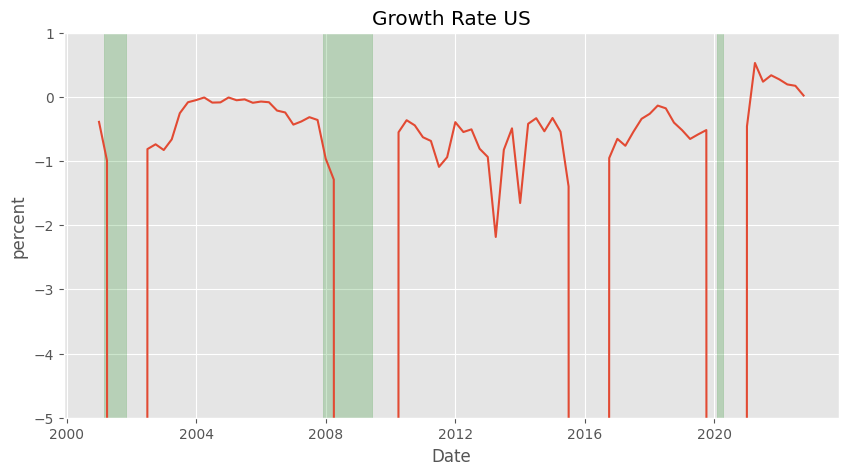

In [19]:
# log growth

gdp['GDP'] = pd.to_numeric(gdp['GDP'])
# Calculate inflation rate
gdp['GDP_rate'] = (gdp['GDP'] - gdp['GDP'].shift(1)) / gdp['GDP'].shift(1)

# Convert inflation rate to percentage
gdp['GDP_rate']  = gdp['GDP_rate']  * 100

# Subset only after year x
gdp_subset = gdp.loc[gdp.index> '01-01-2000']

# Smoothen it
gdp_subset['GDP_rate'] = gdp_subset['GDP_rate'].rolling(4).mean() - 0.745

gdp_subset['GDP_rate_log'] = np.log10(gdp_subset['GDP_rate'])
gdp_subset['GDP_rate_log'] =gdp_subset['GDP_rate_log'].fillna(-400)


fig, ax = plt.subplots(figsize=[10, 5])
ax.plot(gdp_subset['GDP_rate_log'][3:])
ax.set_ylim(-5, 1)

ax.set_title('Growth Rate US')
ax.set_ylabel("percent")
ax.set_xlabel("Date")


for i in range(0, len(recession_dates), 2):
    ax.axvspan(recession_dates[i], recession_dates[i+1], alpha=0.2, color='green')

plt.show()

C:\Users\pietr\AppData\Local\Temp\ipykernel_23220\2440419719.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpi_subset['inflation_rate'] = cpi_subset['inflation_rate'].rolling(24).mean() -1.9
C:\Users\pietr\anaconda3\envs\stock\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\pietr\AppData\Local\Temp\ipykernel_23220\2440419719.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpi_subset['in

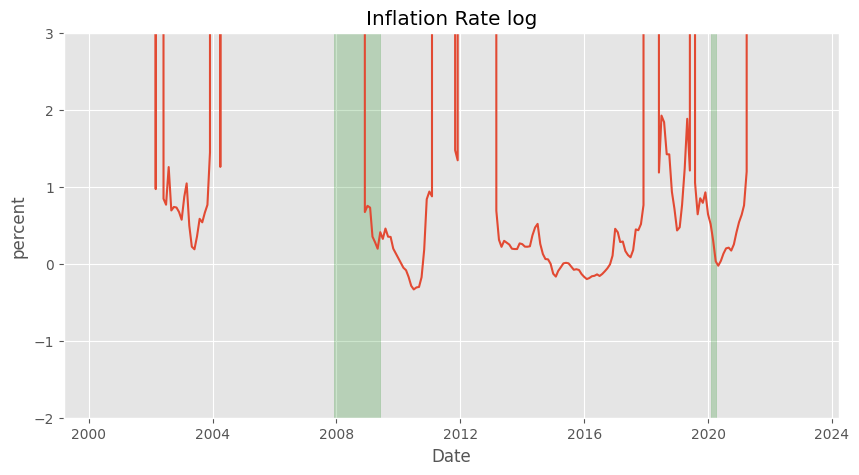

In [20]:
#log inflation rate (cpi)

cpi_subset = cpi.loc[cpi.index> '01-01-2000']
# Smoothen it
#cpi_subset['inflation_rate'] = cpi_subset['inflation_rate'].rolling(24).mean() -1.9
cpi_subset['inflation_rate'] = cpi_subset['inflation_rate'].rolling(24).mean() -1.9

#log 
cpi_subset['inflation_rate_log'] = np.log10(-cpi_subset['inflation_rate'])
cpi_subset['inflation_rate_log'] = cpi_subset['inflation_rate_log'].fillna(-400)

fig, ax = plt.subplots(figsize=[10, 5])
ax.plot(-cpi_subset['inflation_rate_log'][3:])
ax.set_ylim(-2, 3)
ax.set_title('Inflation Rate log')
ax.set_ylabel("percent")
ax.set_xlabel("Date")

for i in range(2, len(recession_dates), 2):
    ax.axvspan(recession_dates[i], recession_dates[i+1], alpha=0.2, color='green')

plt.show()


In [21]:
print(cpi_subset['inflation_rate_log'][0])

-400.0


### Merge data

In [23]:
# cpi and gdp

df = pd.merge_asof(cpi_subset, #https://stackoverflow.com/questions/60674791/merge-dataframes-with-different-lenght-on-nearest-datetime
                   gdp_subset,
                   left_on=cpi_subset.index,
                   right_on=gdp_subset.index,
                   direction='backward').set_index('key_0')
print(df[:20])

                           CPIAUCSL  inflation_rate  inflation_rate_log  \
key_0                                                                     
2000-02-01 00:00:00+00:00     170.0             NaN              -400.0   
2000-03-01 00:00:00+00:00     171.0             NaN              -400.0   
2000-04-01 00:00:00+00:00     170.9             NaN              -400.0   
2000-05-01 00:00:00+00:00     171.2             NaN              -400.0   
2000-06-01 00:00:00+00:00     172.2             NaN              -400.0   
2000-07-01 00:00:00+00:00     172.7             NaN              -400.0   
2000-08-01 00:00:00+00:00     172.7             NaN              -400.0   
2000-09-01 00:00:00+00:00     173.6             NaN              -400.0   
2000-10-01 00:00:00+00:00     173.9             NaN              -400.0   
2000-11-01 00:00:00+00:00     174.2             NaN              -400.0   
2000-12-01 00:00:00+00:00     174.6             NaN              -400.0   
2001-01-01 00:00:00+00:00

### Algorithm (Macroeconomic quadrant)

Depending if inflation_rate is up or down and economic_growth is up or down, invest in quadrant 1,2,3 or 4


In [10]:
quadrant = []
for i in range(len(df)):
    if df['GDP_rate_log'][i] != -400 and df['inflation_rate_log'][i] == -400:
        quadrant.append(1)
        #print('invest in ("Quadrant 1: Inflation up, GDP up")') #quadrant 1 consists of the following assets= ["Emerging equities", "International real estate", "Gold", "Commodities", "emerging bond spreads", "Inflation protected bonds"]  
    elif df['GDP_rate_log'][i] == -400 and df['inflation_rate_log'][i] == -400:
        quadrant.append(2)

        #print('invest in ("Quadrant 2: Inflation up, GDP down")') # quadrant 2 consists of the following assets= ["Gold", "Commodities", "Emerging bond spreads", "Inflation protected bonds", "cash"]
    elif df['GDP_rate_log'][i] == -400 and df['inflation_rate_log'][i] != -400:
        quadrant.append(3)
        #print('invest in ("Quadrant 3: Inflation down, GDP up")') # quadrant 3 consists of the following assets= ["Developed corporate bond spreads", "intermediate treasuries", "Developed real estate", "Developed equities"]  
    elif df['GDP_rate_log'][i] != -400 and df['inflation_rate_log'][i] != -400: # add if to remember state
        quadrant.append(4)
        #print('invest in ("Quadrant 4: Inflation down, GDP down")') #quadrant 4 consists of the following assets = ["Gold", "Long term treasuries", "cash"]
    else:
        quadrant.append(np.nan)

print(len(quadrant))

313


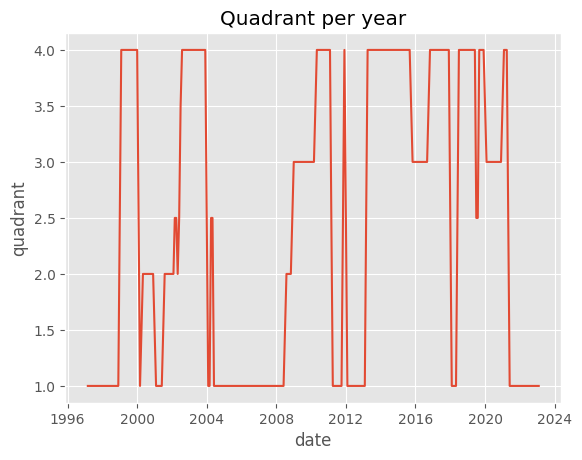

In [11]:
# visualize it

df['quadrant'] = quadrant

plt.plot(df['quadrant'].rolling(2).mean())
#plt.plot(df['quadrant'].loc[(df.index>'01-01-2000') & (df.index < '01-01-2013')])
plt.ylabel('quadrant')
plt.xlabel('date')
plt.title('Quadrant per year')
plt.show()

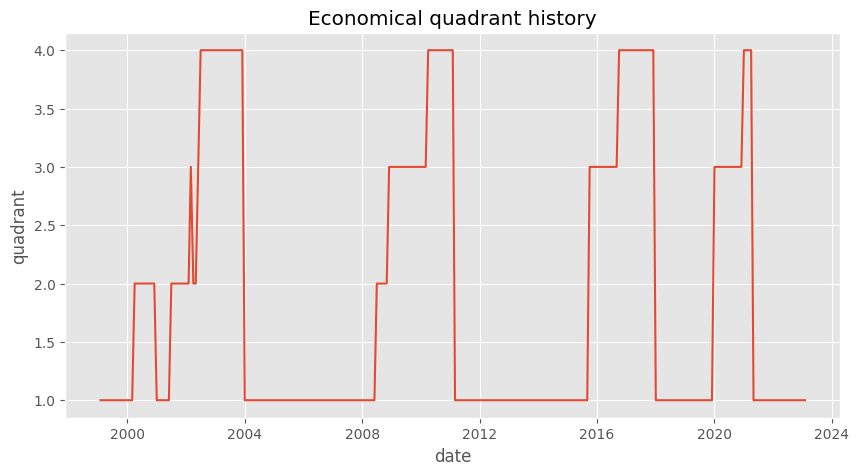

In [12]:
quadrants = [i for i in df['quadrant']]
for i in range(1, len(quadrants)):
    if quadrants[i] ==4 and quadrants[i-1] == 1:
        quadrants[i]=1
    

df['quadrant_cleaned'] = quadrants
# visualize it
plt.figure(figsize=[10, 5])

plt.plot(df['quadrant_cleaned'].loc[df.index> '1999-01-01'])#.rolling(2).mean())
#plt.plot(df['quadrant'].loc[(df.index>'01-01-2000') & (df.index < '01-01-2013')])
plt.ylabel('quadrant')
plt.xlabel('date')
plt.title('Economical quadrant history')
plt.show()

In [13]:
# try with m2sl for inflation rate, or financial conditions (?)